In [84]:


from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [356]:
!jt -r

Reset css and font defaults in:
C:\Users\PRAGYA\.jupyter\custom &
C:\Users\PRAGYA\AppData\Roaming\jupyter\nbextensions


In [39]:
#!pip install pandas praw wordcloud langdetect contractions gensim
import pandas as pd
from pathlib import Path
import zipfile
import os
import sqlite3
from datetime import datetime
import glob
from pprint import pprint
import praw
import pprint
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
import contractions
import re
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from collections import Counter
import gensim
from gensim import corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import gensim.downloader as api
from gensim.models.ldamodel import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
from dateutil.parser import parse
from datetime import datetime

In [40]:
nlp = spacy.load("en_core_web_sm")

In [41]:
print(pd.__version__)

1.5.3


In [42]:
print(Path.cwd())

C:\Users\PRAGYA


-----------------------------------Start here------------------------------------

In [59]:
# Use glob to find all CSV files in the directory
csv_files = glob.glob(r"C:\Users\PRAGYA\MSC Project\news\news csv\*.csv")

In [60]:
len(csv_files)

5

In [61]:
# Check if files were fetched
if csv_files:
    print(f"Fetched {len(csv_files)} CSV files.")
    # Further process the files if needed
    for file in csv_files:
        print(file)  # Print each file name
else:
    print("No CSV files found.")

Fetched 5 CSV files.
C:\Users\PRAGYA\MSC Project\news\news csv\Covid_News.csv
C:\Users\PRAGYA\MSC Project\news\news csv\Health_News.csv
C:\Users\PRAGYA\MSC Project\news\news csv\Latest_News.csv
C:\Users\PRAGYA\MSC Project\news\news csv\Science_&_Technology_News.csv
C:\Users\PRAGYA\MSC Project\news\news csv\World_Politics_News.csv


In [62]:
# Create an empty dataframe to store the combined data
combined_df = pd.DataFrame()

# Get the current date and time
processing_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    try:
        df = pd.read_csv(csv_file, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            print('lat')
            df = pd.read_csv(csv_file, encoding='latin1')
            df = df[df.columns[:11]]
        except UnicodeDecodeError:
            print(f"Error decoding file: {csv_file}. Skipping...")
            continue
    print(csv_file)
    print(len(df.columns))
    # Add a column with the file name
    df['Source_file'] = csv_file.split('\\')[-1]
    # Add a column with the processing date
    df['Processing_date'] = processing_date
    # Append the DataFrame to the list
    print('len - ')
    combined_df = pd.concat([combined_df, df])
    combined_df.to_csv(r'C:\Users\PRAGYA\MSC Project\news\out.csv')  

# Print the combined dataframe
print(combined_df)



C:\Users\PRAGYA\MSC Project\news\news csv\Covid_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Health_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Latest_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Science_&_Technology_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\World_Politics_News.csv
11
len - 
                                                  title  \
0     Apple releases iOS 15.1 with SharePlay and mor...   
1     The Smartest Park on the Block: How One Compan...   
2     Covid-19 website created by Science, Technolog...   
3     SDMC: Hospital quarantine required for non-Mal...   
4     Vanaf volgende maand mogen alleen gevaccineerd...   
...                                                 ...   
2928  Brnabić: "VUČIĆEVO UBISTVO PLANIRANO NA OTKRIV...   
2929     Die Unberechenbarkeit Erdogans wird bedrohlich   
2930  Bundesliga live: So steht es bei Rapid und dem...   
2931  L'espoir d'une candidature unique à gauche 

In [63]:
combined_df

,title,link,keywords,creator,video_url,description,content,pubDate,full_description,image_url,source_id,Source_file,Processing_date
0,Apple releases iOS 15.1 with SharePlay and mor...,https://www.thehansindia.com/technology/tech-n...,"['Tech,Tech News']",['Kahekashan'],NaN,Apple's latest OS update includes a missing iO...,Apple releases iOS 15.1 with SharePlay and mor...,2021-10-26 06:43:41,NaN,https://assets.thehansindia.com/h-upload/2021/...,thehansindia,Covid_News.csv,2024-07-25 22:26:35
1,The Smartest Park on the Block: How One Compan...,https://www.prnewswire.com:443/news-releases/t...,"['Computer & Electronics', 'Networks', 'Teleco...",NaN,NaN,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",NaN,2021-10-26 06:41:00,NaN,NaN,cision,Covid_News.csv,2024-07-25 22:26:35
2,"Covid-19 website created by Science, Technolog...",https://www.thestar.com.my/news/nation/2021/10...,NaN,NaN,NaN,KUALA LUMPUR: The website for AstraZeneca Covi...,NaN,2021-10-26 06:35:00,NaN,https://apicms.thestar.com.my/uploads/images/2...,thestar_my,Covid_News.csv,2024-07-25 22:26:35
3,SDMC: Hospital quarantine required for non-Mal...,https://www.malaymail.com/news/malaysia/2021/1...,"['medical tourists', 'sarawak medical tourism'...",NaN,NaN,"KUCHING, Oct 26 — Non-Malaysians are required ...",The new SOP stated these patients also must ha...,2021-10-26 06:34:00,NaN,NaN,malaymail,Covid_News.csv,2024-07-25 22:26:35
4,Vanaf volgende maand mogen alleen gevaccineerd...,https://www.nu.nl/economie/6164254/vanaf-volge...,"['Economie', 'Algemeen']",['NU.nl/ANP'],NaN,Mensen die met het vliegtuig naar de VS willen...,NaN,2021-10-26 06:30:29,Je gebruikt een adblocker. Wij kunnen onze art...,https://media.nu.nl/m/slixfeuaip4a_sqr256.jpg/...,nu,Covid_News.csv,2024-07-25 22:26:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,"Brnabić: ""VUČIĆEVO UBISTVO PLANIRANO NA OTKRIV...",https://informer.rs/vesti/politika/646750/brna...,['Vesti'],NaN,NaN,Premijerka Srbije Ana Brnabić izjavila je da j...,NaN,2021-10-24 09:51:00,"Brnabić je, govoreći o hapšenju bivše državne ...",NaN,informer,World_Politics_News.csv,2024-07-25 22:26:35
2929,Die Unberechenbarkeit Erdogans wird bedrohlich,https://www.tagesspiegel.de/politik/westliche-...,['Politik'],NaN,NaN,"Unklar ist, auf wen der türkische Präsident no...","Unklar ist, auf wen der türkische Präsident no...",2021-10-24 09:49:47,NaN,https://www.tagesspiegel.de/images/file-photo-...,tagesspiegel,World_Politics_News.csv,2024-07-25 22:26:35
2930,Bundesliga live: So steht es bei Rapid und dem...,https://kurier.at/sport/fussball/bundesliga-li...,['Sport/Fußball'],NaN,NaN,Die Hütteldorfer wollen ihren Sieg aus der Eur...,NaN,2021-10-24 09:48:44,NaN,https://image.kurier.at/images/original/648508...,kurier,World_Politics_News.csv,2024-07-25 22:26:35
2931,L'espoir d'une candidature unique à gauche à l...,https://www.francetvinfo.fr/replay-radio/8h30-...,NaN,NaN,NaN,La présidente du conseil politique du candidat...,NaN,2021-10-24 09:45:57,"Sandrine Rousseau, pr é sidente du conseil pol...",https://www.francetvinfo.fr/image/75wtdwvmt-8f...,francetvinfo,World_Politics_News.csv,2024-07-25 22:26:35


In [64]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101697 entries, 0 to 2932
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             101695 non-null  object
 1   link              101697 non-null  object
 2   keywords          41391 non-null   object
 3   creator           45018 non-null   object
 4   video_url         75 non-null      object
 5   description       91211 non-null   object
 6   content           24005 non-null   object
 7   pubDate           101697 non-null  object
 8   full_description  53721 non-null   object
 9   image_url         51543 non-null   object
 10  source_id         101697 non-null  object
 11  Source_file       101697 non-null  object
 12  Processing_date   101697 non-null  object
dtypes: object(13)
memory usage: 10.9+ MB


In [65]:
combined_df['pubDate'] = combined_df['pubDate'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [66]:
combined_df['pubDate'] = combined_df['pubDate'].astype(str)

combined_df[combined_df['pubDate'].apply(len) > 16]

,title,link,keywords,creator,video_url,description,content,pubDate,full_description,image_url,source_id,Source_file,Processing_date
0,Apple releases iOS 15.1 with SharePlay and mor...,https://www.thehansindia.com/technology/tech-n...,"['Tech,Tech News']",['Kahekashan'],NaN,Apple's latest OS update includes a missing iO...,Apple releases iOS 15.1 with SharePlay and mor...,2021-10-26 06:43:41,NaN,https://assets.thehansindia.com/h-upload/2021/...,thehansindia,Covid_News.csv,2024-07-25 22:26:35
1,The Smartest Park on the Block: How One Compan...,https://www.prnewswire.com:443/news-releases/t...,"['Computer & Electronics', 'Networks', 'Teleco...",NaN,NaN,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",NaN,2021-10-26 06:41:00,NaN,NaN,cision,Covid_News.csv,2024-07-25 22:26:35
2,"Covid-19 website created by Science, Technolog...",https://www.thestar.com.my/news/nation/2021/10...,NaN,NaN,NaN,KUALA LUMPUR: The website for AstraZeneca Covi...,NaN,2021-10-26 06:35:00,NaN,https://apicms.thestar.com.my/uploads/images/2...,thestar_my,Covid_News.csv,2024-07-25 22:26:35
3,SDMC: Hospital quarantine required for non-Mal...,https://www.malaymail.com/news/malaysia/2021/1...,"['medical tourists', 'sarawak medical tourism'...",NaN,NaN,"KUCHING, Oct 26 — Non-Malaysians are required ...",The new SOP stated these patients also must ha...,2021-10-26 06:34:00,NaN,NaN,malaymail,Covid_News.csv,2024-07-25 22:26:35
4,Vanaf volgende maand mogen alleen gevaccineerd...,https://www.nu.nl/economie/6164254/vanaf-volge...,"['Economie', 'Algemeen']",['NU.nl/ANP'],NaN,Mensen die met het vliegtuig naar de VS willen...,NaN,2021-10-26 06:30:29,Je gebruikt een adblocker. Wij kunnen onze art...,https://media.nu.nl/m/slixfeuaip4a_sqr256.jpg/...,nu,Covid_News.csv,2024-07-25 22:26:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,"Brnabić: ""VUČIĆEVO UBISTVO PLANIRANO NA OTKRIV...",https://informer.rs/vesti/politika/646750/brna...,['Vesti'],NaN,NaN,Premijerka Srbije Ana Brnabić izjavila je da j...,NaN,2021-10-24 09:51:00,"Brnabić je, govoreći o hapšenju bivše državne ...",NaN,informer,World_Politics_News.csv,2024-07-25 22:26:35
2929,Die Unberechenbarkeit Erdogans wird bedrohlich,https://www.tagesspiegel.de/politik/westliche-...,['Politik'],NaN,NaN,"Unklar ist, auf wen der türkische Präsident no...","Unklar ist, auf wen der türkische Präsident no...",2021-10-24 09:49:47,NaN,https://www.tagesspiegel.de/images/file-photo-...,tagesspiegel,World_Politics_News.csv,2024-07-25 22:26:35
2930,Bundesliga live: So steht es bei Rapid und dem...,https://kurier.at/sport/fussball/bundesliga-li...,['Sport/Fußball'],NaN,NaN,Die Hütteldorfer wollen ihren Sieg aus der Eur...,NaN,2021-10-24 09:48:44,NaN,https://image.kurier.at/images/original/648508...,kurier,World_Politics_News.csv,2024-07-25 22:26:35
2931,L'espoir d'une candidature unique à gauche à l...,https://www.francetvinfo.fr/replay-radio/8h30-...,NaN,NaN,NaN,La présidente du conseil politique du candidat...,NaN,2021-10-24 09:45:57,"Sandrine Rousseau, pr é sidente du conseil pol...",https://www.francetvinfo.fr/image/75wtdwvmt-8f...,francetvinfo,World_Politics_News.csv,2024-07-25 22:26:35


In [68]:
combined_df.columns

Index(['title', 'link', 'keywords', 'creator', 'video_url', 'description',
       'content', 'pubDate', 'full_description', 'image_url', 'source_id',
       'Source_file', 'Processing_date'],
      dtype='object')

In [73]:
keep_columns = ['title', 'description',
        'pubDate', 'source_id',
       'Source_file', 'Processing_date']

In [74]:
combined_df = combined_df[keep_columns]
combined_df.head()

,title,description,pubDate,source_id,Source_file,Processing_date
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35
4,Vanaf volgende maand mogen alleen gevaccineerd...,Mensen die met het vliegtuig naar de VS willen...,2021-10-26 06:30:29,nu,Covid_News.csv,2024-07-25 22:26:35


In [85]:
combined_df['title'].iloc[0]

'Apple releases iOS 15.1 with SharePlay and more camera options for iPhone 13 Pro'

In [86]:
combined_df['description'].iloc[0]

"Apple's latest OS update includes a missing iOS 15 feature and the big new feature is the return of SharePlay. SharePlay is a feature that was originally supposed to ship in iOS 15; allows people to call friends or family and watch movies, TV or listen to music together."

In [87]:
combined_df['title'].iloc[2]

'Covid-19 website created by Science, Technology and Innovation Ministry at no cost, says Dr Adham'

In [88]:
combined_df['description'].iloc[2]

'KUALA LUMPUR: The website for AstraZeneca Covid-19 vaccine registrations did not crash due to heavy user traffic during the second round of opt-in on May 26, said Datuk Seri Dr Adham Baba. Read full story'

In [13]:
# # Create an empty dataframe to store the combined data
# combined_df = pd.DataFrame()

# # Get the current date and time
# processing_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# # Loop through each CSV file and append its contents to the combined dataframe
# for csv_file in csv_files:
#     try:
#         df = pd.read_csv(csv_file, encoding='utf-8')
# #         df['pubDate'] = pd.to_datetime(df['pubDate'], format='%d/%m/%Y %H:%M',errors='coerce')
# #         df = df.dropna(subset=['pubDate'])
#     except UnicodeDecodeError:
#         try:
#             print('lat')
#             df = pd.read_csv(csv_file, encoding='latin1')
#             df = df[df.columns[:11]]
# #             df['pubDate'] = pd.to_datetime(df['pubDate'], format='%d/%m/%Y %H:%M',errors='coerce')
# #             df = df.dropna(subset=['pubDate'])
#         except UnicodeDecodeError:
#             print(f"Error decoding file: {csv_file}. Skipping...")
#             continue
#     print(csv_file)
#     print(len(df.columns))
#     # Add a column with the file name
#     df['Source_file'] = csv_file.split('\\')[-1]
#     # Add a column with the processing date
#     df['Processing_date'] = processing_date
#     # Append the DataFrame to the list
#     print('len - ')
#     combined_df = pd.concat([combined_df, df])
#     combined_df.to_csv(r'C:\Users\PRAGYA\MSC Project\news\out.csv')  

# # Print the combined dataframe
# print(combined_df)



lat


C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_32596\1630168960.py:16: DtypeWarning: Columns (4,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding='latin1')


C:\Users\PRAGYA\MSC Project\news\news csv\Covid_and_Vaccine_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Covid_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Entertainment_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Health_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Latest_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Science_&_Technology_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\Sports_News.csv
11
len - 
C:\Users\PRAGYA\MSC Project\news\news csv\World_Politics_News.csv
11
len - 
                                                  title  \
0     à¹à¸à¹à¸à¸à¸µà¹à¸à¸µà¹! 10 à¸à¸§.à¸à...   
1     EMA: dawka przypominajÄca Moderny moÅ¼e byÄ ...   
2     LOOK: Megan Thee Stallionâs college graduati...   
3     Vaccini, Crisanti: âAumento casi in Regno Un...   
4     A Covid-19 miatt kipusztulhatott az egyik infl...   
...                                                 ...   
2928

In [89]:
print(len(combined_df))

101697


In [90]:
combined_df.describe()

,title,description,pubDate,source_id,Source_file,Processing_date
count,101695,91211,101697,101697,101697,101697
unique,77191,69811,49271,944,5,1
top,Parents more hesitant to vaccinate kids than t...,"<a class=""fancy..(계속)",2021-10-25 16:00:00,google,Latest_News.csv,2024-07-25 22:26:35
freq,37,103,160,3978,86560,101697


In [91]:
combined_df.head()

,title,description,pubDate,source_id,Source_file,Processing_date
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35
4,Vanaf volgende maand mogen alleen gevaccineerd...,Mensen die met het vliegtuig naar de VS willen...,2021-10-26 06:30:29,nu,Covid_News.csv,2024-07-25 22:26:35


In [92]:
def try_parsing_date(text):
    for fmt in ('%d/%m/%Y %H:%M', '%Y-%m-%d %H:%M:%S', '%Y-%m-%dT%H:%M:%S'):
        try:
            return datetime.strptime(str(text), fmt)
        except ValueError:
            continue
    try:
        return datetime.fromtimestamp(float(text))
    except (ValueError, TypeError):
        return pd.NaT

# Apply the function to the 'pubDate' column
combined_df['pubDate'] = combined_df['pubDate'].apply(try_parsing_date)
combined_df = combined_df.dropna(subset=['pubDate'])
combined_df

,title,description,pubDate,source_id,Source_file,Processing_date
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35
4,Vanaf volgende maand mogen alleen gevaccineerd...,Mensen die met het vliegtuig naar de VS willen...,2021-10-26 06:30:29,nu,Covid_News.csv,2024-07-25 22:26:35
...,...,...,...,...,...,...
2928,"Brnabić: ""VUČIĆEVO UBISTVO PLANIRANO NA OTKRIV...",Premijerka Srbije Ana Brnabić izjavila je da j...,2021-10-24 09:51:00,informer,World_Politics_News.csv,2024-07-25 22:26:35
2929,Die Unberechenbarkeit Erdogans wird bedrohlich,"Unklar ist, auf wen der türkische Präsident no...",2021-10-24 09:49:47,tagesspiegel,World_Politics_News.csv,2024-07-25 22:26:35
2930,Bundesliga live: So steht es bei Rapid und dem...,Die Hütteldorfer wollen ihren Sieg aus der Eur...,2021-10-24 09:48:44,kurier,World_Politics_News.csv,2024-07-25 22:26:35
2931,L'espoir d'une candidature unique à gauche à l...,La présidente du conseil politique du candidat...,2021-10-24 09:45:57,francetvinfo,World_Politics_News.csv,2024-07-25 22:26:35


In [93]:
101697 - len(combined_df)

0

In [94]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101697 entries, 0 to 2932
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   title            101695 non-null  object        
 1   description      91211 non-null   object        
 2   pubDate          101697 non-null  datetime64[ns]
 3   source_id        101697 non-null  object        
 4   Source_file      101697 non-null  object        
 5   Processing_date  101697 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.5+ MB


In [95]:
# Connect to SQLite database
conn = sqlite3.connect("combined_news.db")
cur = conn.cursor()

In [96]:
# load combined stocks data into the stocks database
combined_df.to_sql("news_data", conn, if_exists='replace', index=False)

# CHECK IF DATA INSERTED INTO stocks_data
query = "SELECT * FROM news_data LIMIT 5;"
n_result_df = pd.read_sql(query, conn)
n_result_df 

,title,description,pubDate,source_id,Source_file,Processing_date
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35
4,Vanaf volgende maand mogen alleen gevaccineerd...,Mensen die met het vliegtuig naar de VS willen...,2021-10-26 06:30:29,nu,Covid_News.csv,2024-07-25 22:26:35


In [97]:
# CHECK the distinct source files that are loaded
query1 = "SELECT DISTINCT Source_file FROM news_data;"
n_result_df1 = pd.read_sql(query1, conn)
n_result_df1

,Source_file
0,Covid_News.csv
1,Health_News.csv
2,Latest_News.csv
3,Science_&_Technology_News.csv
4,World_Politics_News.csv


In [98]:
# CHECK the distinct source files that are loaded
query2 = "SELECT count(*) FROM news_data;"
n_result_df2 = pd.read_sql(query2, conn)
n_result_df2

,count(*)
0,101697


In [132]:
# Remove stop words
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [133]:
add_words = {'news','read','story','world'}
# Combine stopwords, negative words, and additional custom stop words
stop_words = stop_words.union(add_words)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'news',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 '

In [134]:
keep_words = { 'about',
 'above',
 'after',
 'again',
 'against','because','few', 'most','no','not',
 'now',
    'not', 'no', 'none', 'never', 'nobody', 'nothing', 'neither', 'nowhere',
    'cannot', 'can\'t', 'won\'t', 'don\'t', 'doesn\'t', 'didn\'t', 'isn\'t', 'aren\'t', 'wasn’t', 'weren’t', 'hasn’t', 'haven’t', 'hadn’t', 
    'couldn’t', 'shouldn’t', 'wouldn’t', 'mightn’t', 'mustn’t','hasn\'t', 'hasn\'','hadn\'t', 'hadn\'',
}
# Filter stopwords to keep only the negative words
stop_words =stop_words - keep_words
stop_words

{'a',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'news',
 'nor',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 'read',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'story',
 'such',
 't',
 'than',
 'th

In [135]:
# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Contractions expansion
    try:
        text = contractions.fix(text)
    except:
        print(text)
    text =  re.sub('[\?|$|.|!-/,]',"", text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    tokens = [token.lemma_ for token in nlp(' '.join(tokens))]
    # Remove single alphabet characters
    tokens = [word for word in tokens if len(word) > 1 and word.isalpha()]

    # Join tokens back to string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [136]:
print(combined_df['description'].iloc[2])
clean_text(combined_df['description'].iloc[2])

KUALA LUMPUR: The website for AstraZeneca Covid-19 vaccine registrations did not crash due to heavy user traffic during the second round of opt-in on May 26, said Datuk Seri Dr Adham Baba. Read full story


'kuala lumpur website astrazeneca covid vaccine registration not crash due heavy user traffic second round optin may say datuk seri dr adham baba full'

In [137]:
# Function to detect language
def detect_language(text):
    try:
        # Check if the text is a valid string
        if isinstance(text, str):
            return detect(text)
        else:
            return "unknown"
    except LangDetectException:
        return "unknown"

In [138]:
print(combined_df['description'].iloc[2])
detect_language(combined_df['description'].iloc[2])

KUALA LUMPUR: The website for AstraZeneca Covid-19 vaccine registrations did not crash due to heavy user traffic during the second round of opt-in on May 26, said Datuk Seri Dr Adham Baba. Read full story


'en'

In [28]:
# combined_df_copy = combined_df.copy()

In [29]:
# combined_df = combined_df_copy

In [139]:
combined_df['combined'] = combined_df['title'] + combined_df['description']
combined_df.head()

,title,description,pubDate,source_id,Source_file,Processing_date,combined
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35,Apple releases iOS 15.1 with SharePlay and mor...
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35,The Smartest Park on the Block: How One Compan...
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35,"Covid-19 website created by Science, Technolog..."
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35,SDMC: Hospital quarantine required for non-Mal...
4,Vanaf volgende maand mogen alleen gevaccineerd...,Mensen die met het vliegtuig naar de VS willen...,2021-10-26 06:30:29,nu,Covid_News.csv,2024-07-25 22:26:35,Vanaf volgende maand mogen alleen gevaccineerd...


In [140]:
# Apply the clean text function to the 'title' column
combined_df['clean_title'] = combined_df['combined'].apply(clean_text)
combined_df.head()

Süper Lig güncel puan durumu (25 Ekim)Süper Lig puan durumu 10. hafta oynanacak maçlar öncesinde sporseverler tarafından araştırılıyor. Haftanın derbi maçında bu akşam Beşiktaş evinde Galatasaray'ı ağırlayacak. İşte, Spor Toto Süper Lig 10. hafta maç sonuçları ve puan durumu
26 Ekim BİM aktüel ürünler kataloğu!26 Ekim BİM aktüel ürünler kataloğu satışa çıkıyor. BİM aktüel ürünlerde bu hafta neler var? sorusu alışveriş yapmak için indirim bekleyenlerin gündeminde. BİM'de bu hafta pek çok indirimli ürün raflardaki yerini alacak. İşte 26 Ekim BİM aktüel kataloğu
İmamoğlu, İYİ Parti paylaşımıİstanbul Büyükşehir Belediye (İBB) Başkanı Ekrem İmamoğlu, İYİ Parti’nin 4. kuruluş yıl dönümü dolayısıyla sosyal medya mesajı paylaştı. İmamoğlu, paylaşımında şu ifadeleri kullandı: “İYİ Parti 4 yaşında. Sayın Genel Başkan Meral Akşener, nezdinde, Millet İttifakı’nın yol arkadaşı olan tüm değerli İYİ Partili dostlarımı tebrik ediyorum.” İmamoğlu, paylaşımında Meral Akşener’in fotoğrafına yer ver verdi

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35,Apple releases iOS 15.1 with SharePlay and mor...,apple release io shareplay camera option iphon...
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35,The Smartest Park on the Block: How One Compan...,smart park block one company manage survive th...
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35,"Covid-19 website created by Science, Technolog...",covid website create science technology innova...
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35,SDMC: Hospital quarantine required for non-Mal...,sdmc hospital quarantine require nonmalaysian ...
4,Vanaf volgende maand mogen alleen gevaccineerd...,Mensen die met het vliegtuig naar de VS willen...,2021-10-26 06:30:29,nu,Covid_News.csv,2024-07-25 22:26:35,Vanaf volgende maand mogen alleen gevaccineerd...,vanaf volgende maand mogen alleen gevaccineerd...


In [141]:
# Apply the language detection function to the 'clean title' column
combined_df['language'] = combined_df['clean_title'].apply(detect_language)
combined_df.head()

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title,language
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35,Apple releases iOS 15.1 with SharePlay and mor...,apple release io shareplay camera option iphon...,en
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35,The Smartest Park on the Block: How One Compan...,smart park block one company manage survive th...,en
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35,"Covid-19 website created by Science, Technolog...",covid website create science technology innova...,en
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35,SDMC: Hospital quarantine required for non-Mal...,sdmc hospital quarantine require nonmalaysian ...,en
4,Vanaf volgende maand mogen alleen gevaccineerd...,Mensen die met het vliegtuig naar de VS willen...,2021-10-26 06:30:29,nu,Covid_News.csv,2024-07-25 22:26:35,Vanaf volgende maand mogen alleen gevaccineerd...,vanaf volgende maand mogen alleen gevaccineerd...,nl


In [142]:
combined_df.to_csv('combined_df_run.csv')

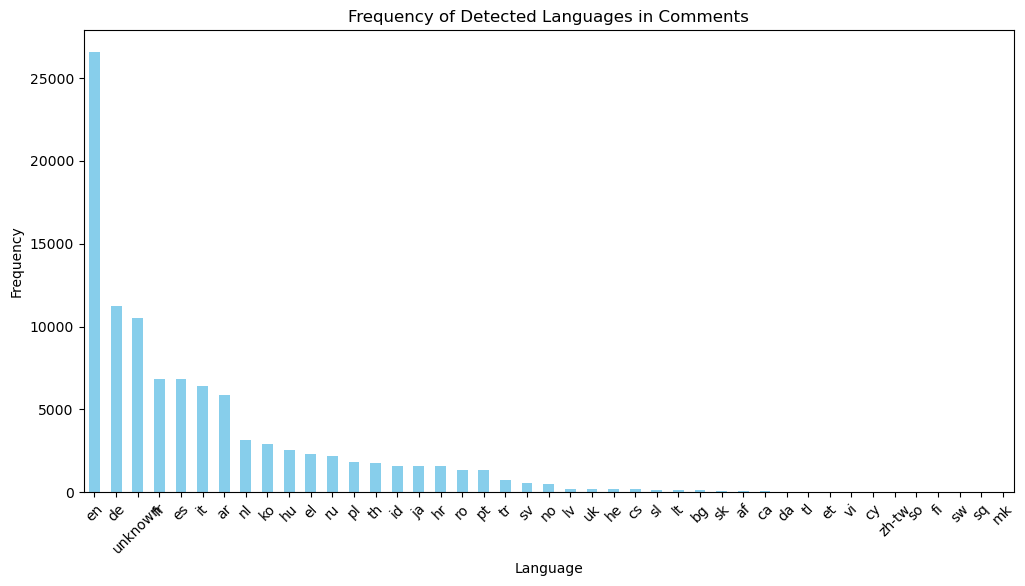

In [143]:
# Display the distribution of languages detected
language_distribution = combined_df['language'].value_counts()

# Plotting the language distribution
plt.figure(figsize=(12, 6))
language_distribution.plot(kind='bar', color='skyblue')
plt.title('Frequency of Detected Languages in Comments')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [146]:
combined_df[combined_df['language'] == 'de'].iloc[1][0]

'Dritte Spritze: "Schleppender Verlauf": Fachleute und Politiker fordern mehr Tempo bei Corona-Boostern'

In [151]:
combined_df[combined_df['language'] == 'unknown'].iloc[9][0]

'Exclusive: African Union to buy up to 110 million Moderna COVID-19 vaccines - officials'

In [159]:
combined_df[combined_df['language'] == 'no'].iloc[10][0]

'Kronprins Haakon hyller Glimt: – Utrolig imponerende'

In [157]:
for each in combined_df['language'].unique():
    print(each)
    print(combined_df[combined_df['language'] == each].iloc[1][0])
    print('-----------')
   

en
The Smartest Park on the Block: How One Company Managed to Survive and Thrive Through the Pandemic
-----------
nl
Vooruitzicht: iedere winter tienduizend Covid-patiënten
-----------
es
Burbuja epidemiológica en Riga
-----------
fr
Covid-19 : la 3e dose de Moderna approuvée en Europe, un confinement ciblé en Chine… Le point dans le monde
-----------
de
Dritte Spritze: "Schleppender Verlauf": Fachleute und Politiker fordern mehr Tempo bei Corona-Boostern
-----------
th
สถานการณ์ Covid-19 (ระลอกใหม่) จ.เชียงใหม่ พบผู้ติดเชื้อเพิ่ม 270 ราย (26 ต.ค. 2564)
-----------
it
Covid alla Casa di riposo, si allarga il focolaio: altri 10 positivi. Sono ora 35 i contagiati tra ospiti e personale
-----------
pl
USA: Protesty służb w związku z obowiązkowymi szczepieniami. Aresztowana 20 osób
-----------
unknown
China ha suministrado más de 1.500 millones de dosis de la vacuna contra el covid-19 a más de 100 países y organizaciones
-----------
hu
Zacher Gábor: most vittünk be egy oltástagadót koronav

IndexError: single positional indexer is out-of-bounds

In [163]:
combined_df[combined_df['language'] == 'unknown']

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title,language
16,Kevesebb Adria,NaN,2021-10-26 06:14:44,444,Covid_News.csv,2024-07-25 22:26:35,NaN,,unknown
24,China ha suministrado más de 1.500 millones de...,NaN,2021-10-26 06:07:01,rt_mx,Covid_News.csv,2024-07-25 22:26:35,NaN,,unknown
33,The government wants to expand the 'digital id...,NaN,2021-10-26 06:01:31,theconversation,Covid_News.csv,2024-07-25 22:26:35,NaN,,unknown
37,ASEAN inicia su cumbre de mandatarios sin repr...,NaN,2021-10-26 06:00:04,infobae,Covid_News.csv,2024-07-25 22:26:35,NaN,,unknown
49,A Facebook és a YouTube is törölte azt a videó...,NaN,2021-10-26 05:43:37,444,Covid_News.csv,2024-07-25 22:26:35,NaN,,unknown
...,...,...,...,...,...,...,...,...,...
2772,Rishi Sunak hints public sector pay could rise...,NaN,2021-10-24 12:09:44,telegraph,World_Politics_News.csv,2024-07-25 22:26:35,NaN,,unknown
2783,Feletti se mostró confiado tras las primeras h...,NaN,2021-10-24 11:59:01,mdzol,World_Politics_News.csv,2024-07-25 22:26:35,NaN,,unknown
2853,British envoy seeks Canada’s climate change he...,NaN,2021-10-24 11:00:00,thestar,World_Politics_News.csv,2024-07-25 22:26:35,NaN,,unknown
2854,Parents more hesitant to vaccinate kids than t...,NaN,2021-10-24 11:00:00,thestar,World_Politics_News.csv,2024-07-25 22:26:35,NaN,,unknown


In [203]:
combined_df_clean= combined_df[(combined_df['language'] == 'en') | (combined_df['language'] == 'unknown')]

In [204]:
# combined_df_clean=combined_df[combined_df['language']=='en']
print(len(combined_df_clean))
# combined_df_clean.head()

37039


In [205]:
combined_df_clean.to_csv(r'C:\Users\PRAGYA\MSC Project\news\clean_title_df_1.csv')

In [206]:
#NER Analysis

In [207]:
combined_df_clean

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title,language
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35,Apple releases iOS 15.1 with SharePlay and mor...,apple release io shareplay camera option iphon...,en
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35,The Smartest Park on the Block: How One Compan...,smart park block one company manage survive th...,en
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35,"Covid-19 website created by Science, Technolog...",covid website create science technology innova...,en
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35,SDMC: Hospital quarantine required for non-Mal...,sdmc hospital quarantine require nonmalaysian ...,en
10,Jab deadline looms for Tas health workers,About one in 10 health workers in Tasmania are...,2021-10-26 06:24:04,perthnow,Covid_News.csv,2024-07-25 22:26:35,Jab deadline looms for Tas health workersAbout...,jab deadline loom tas health workersabout one ...,en
...,...,...,...,...,...,...,...,...,...
2868,"Were amateurs in 2017 MCD polls, situation cha...",Unlike the Municipal Corporation of Delhi (MCD...,2021-10-24 10:48:00,business-standard,World_Politics_News.csv,2024-07-25 22:26:35,"Were amateurs in 2017 MCD polls, situation cha...",amateur mcd poll situation change now aapunlik...,en
2895,"Un gobierno que gestiona cómodo y sin presión,...",NaN,2021-10-24 10:19:01,mdzol,World_Politics_News.csv,2024-07-25 22:26:35,NaN,,unknown
2909,McGowan security scare: Person taking photogra...,New details surrounding the scare which prompt...,2021-10-24 10:05:00,thewest,World_Politics_News.csv,2024-07-25 22:26:35,McGowan security scare: Person taking photogra...,mcgowan security scare person take photograph ...,en
2915,Transition to electric vehicles ‘won’t happen ...,Australia needs to start the switch to electri...,2021-10-24 10:00:00,smh,World_Politics_News.csv,2024-07-25 22:26:35,Transition to electric vehicles ‘won’t happen ...,transition electric vehicle not happen overnig...,en


In [208]:
comment_combined =''
for each in combined_df_clean['clean_title']:
    comment_combined = comment_combined + " " + each
print(comment_combined)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [209]:
len(comment_combined)

8299711

In [210]:
startofdoc = 0
endofdoc = 1000000

df_ner = pd.DataFrame(columns=['Text','Label'])

while startofdoc < len(comment_combined) :
    print(startofdoc, endofdoc)
    doc = nlp(comment_combined[startofdoc:endofdoc])

    for ent in doc.ents:
        df_ner.loc[len(df_ner)]  = [ent.text, ent.label_]
    startofdoc = startofdoc + 1000000 + 1
    endofdoc = endofdoc + 1000000 - 2
    #     break
df_ner.head()

0 1000000
1000001 1999998
2000002 2999996
3000003 3999994
4000004 4999992
5000005 5999990
6000006 6999988
7000007 7999986
8000008 8999984


,Text,Label
0,october,DATE
1,adhamkuala lumpur,PERSON
2,covid vaccine registration,PERSON
3,second,ORDINAL
4,seri,NORP


In [211]:
df_ner['Label'].unique()

array(['DATE', 'PERSON', 'ORDINAL', 'NORP', 'CARDINAL', 'ORG', 'GPE',
       'LOC', 'TIME', 'FAC', 'PRODUCT', 'QUANTITY', 'LANGUAGE', 'MONEY',
       'LAW', 'EVENT', 'PERCENT', 'WORK_OF_ART'], dtype=object)

In [212]:
for each in df_ner['Label'].unique():
    print(each)
    xorg = df_ner[df_ner['Label'] ==each]
    print(xorg['Text'].value_counts()[:10])
    print("-----"*20)

DATE
october     2369
monday      1801
sunday      1726
today       1476
november     717
year         698
daily        670
week         586
saturday     565
tuesday      440
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
PERSON
max                    290
khan                   225
halyna hutchin         201
james michael tyler    183
aryan khan             182
macos monterey         158
hamilton               158
lewis hamilton         100
michael tyler           81
ben                     80
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
ORDINAL
first          4487
second          714
third           331
fourth          139
fifth           113
sixth            62
seventh          48
eighth           42
ninth            32
rajinikanth      11
Name: Text, dtype: int64
---------------------------------------------------------------

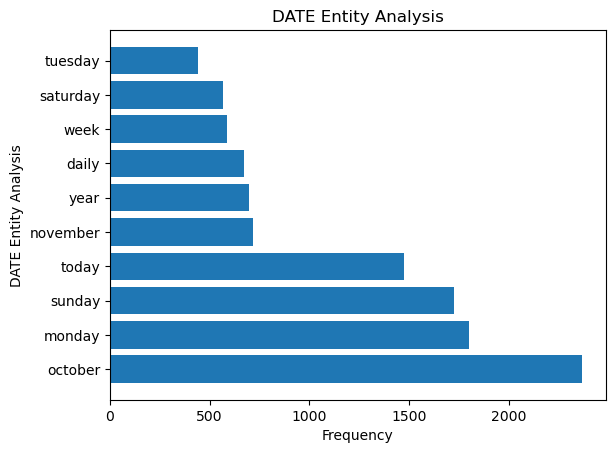

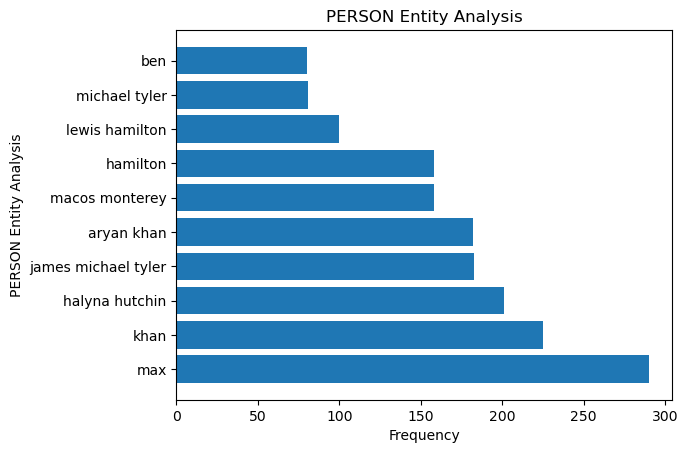

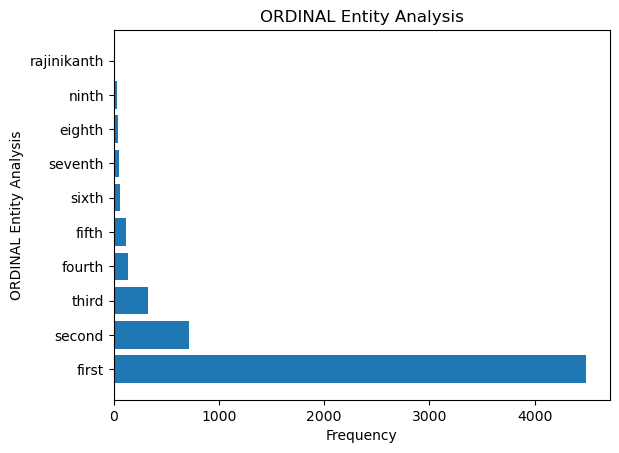

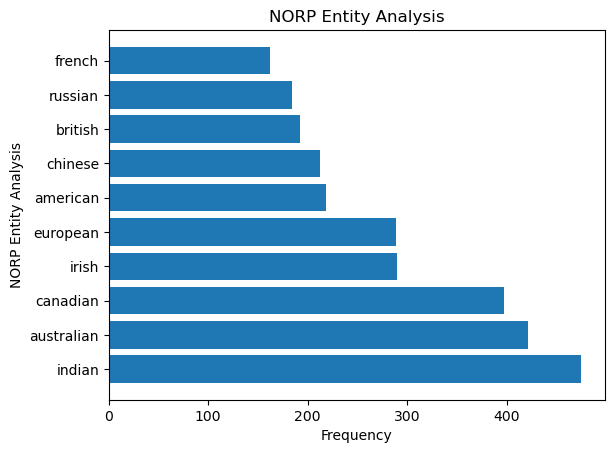

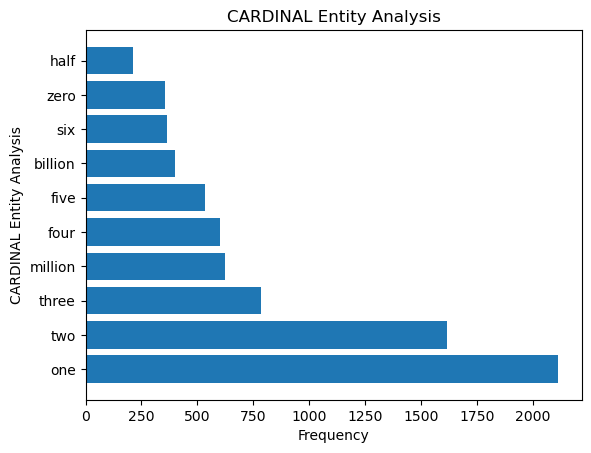

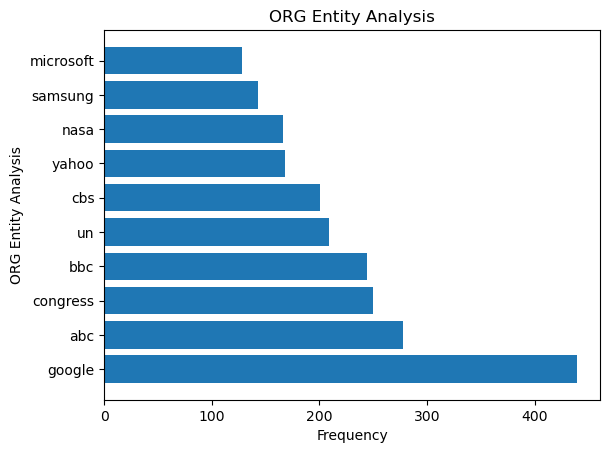

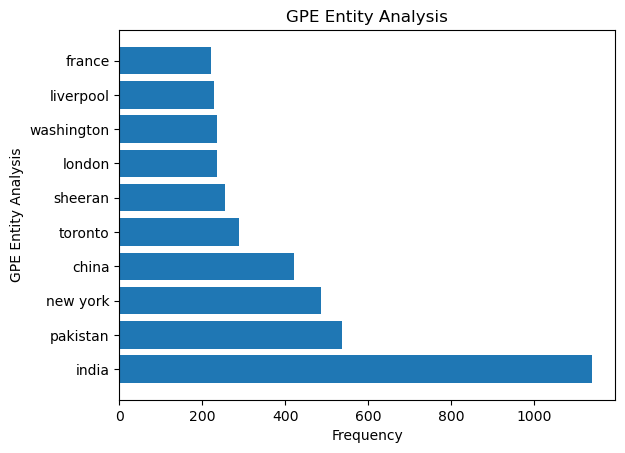

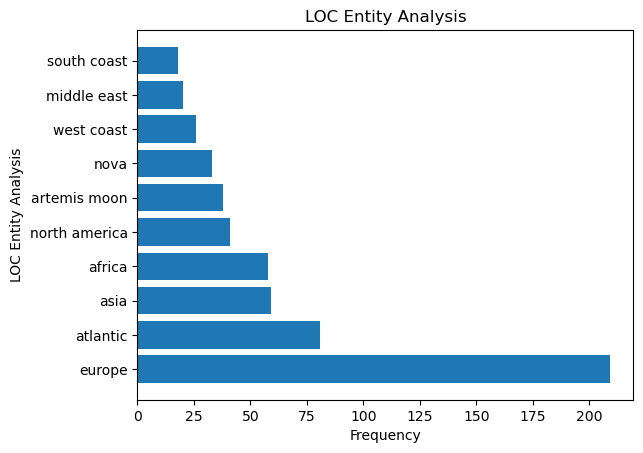

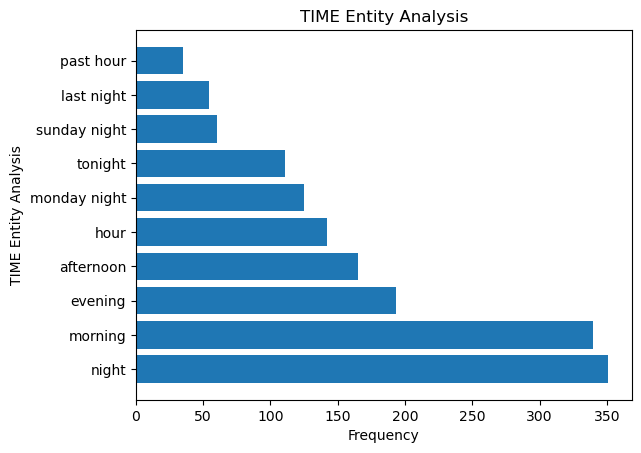

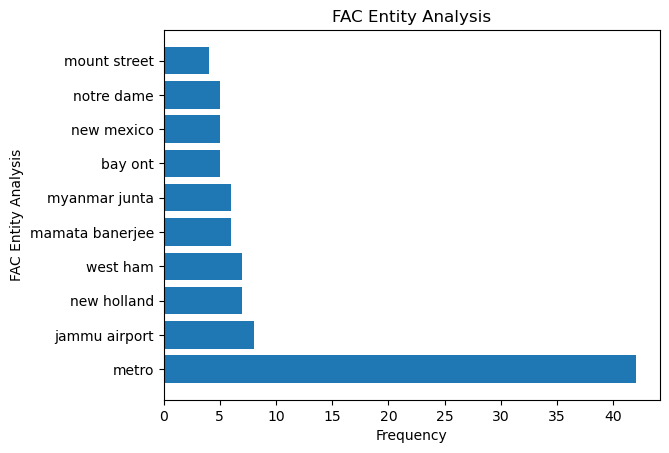

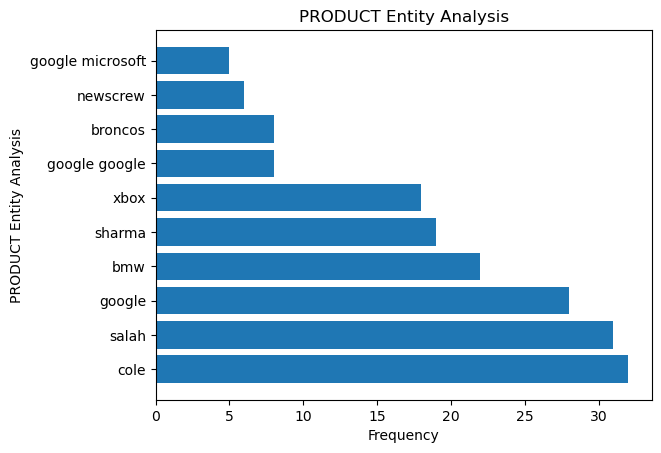

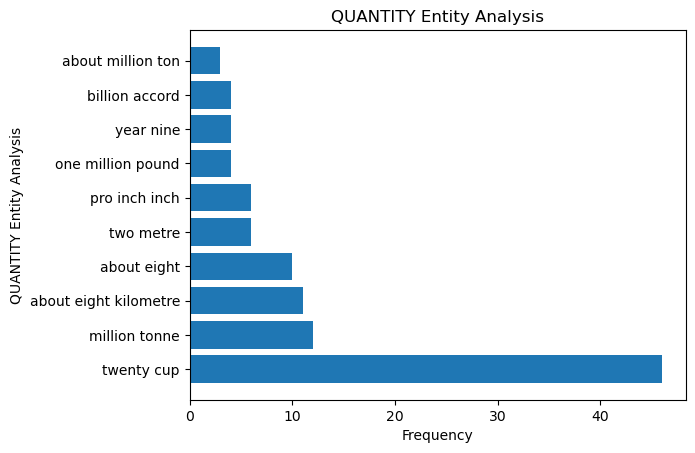

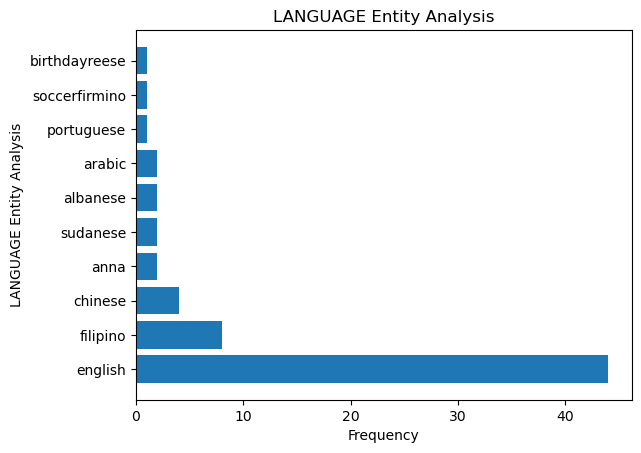

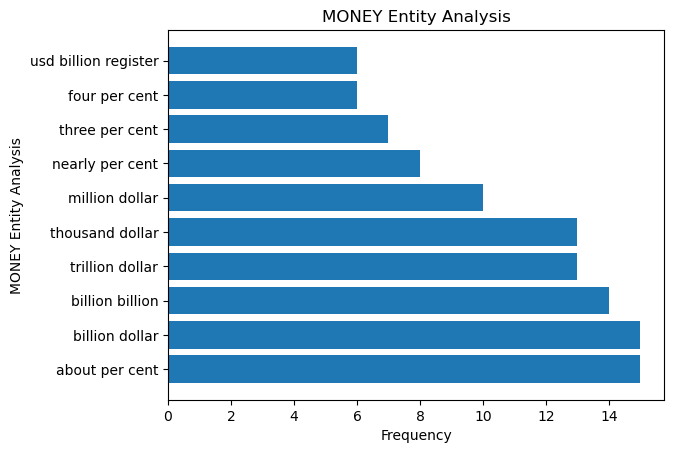

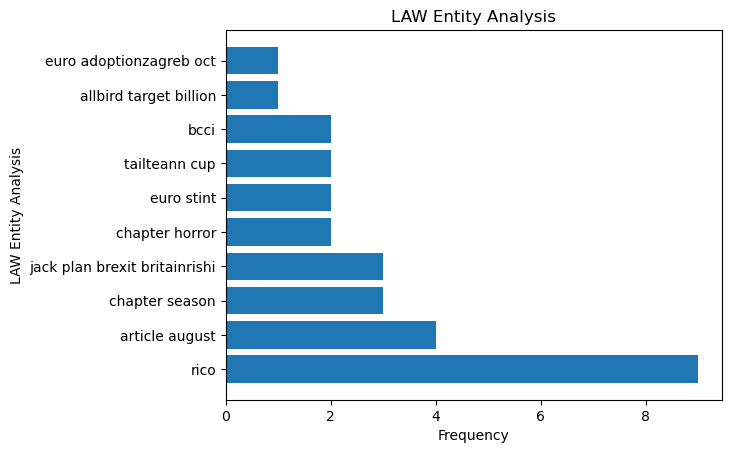

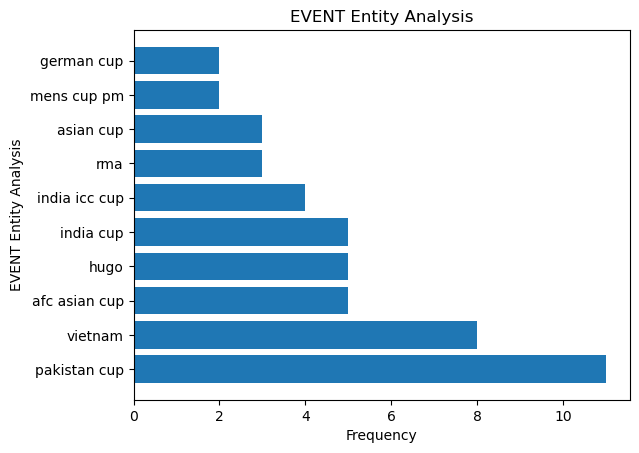

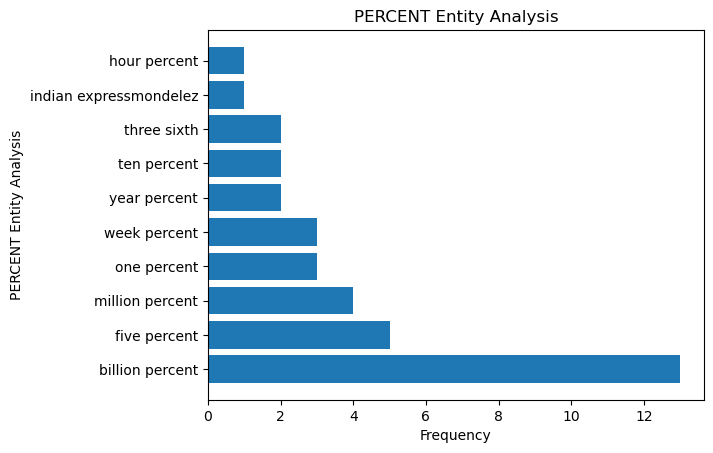

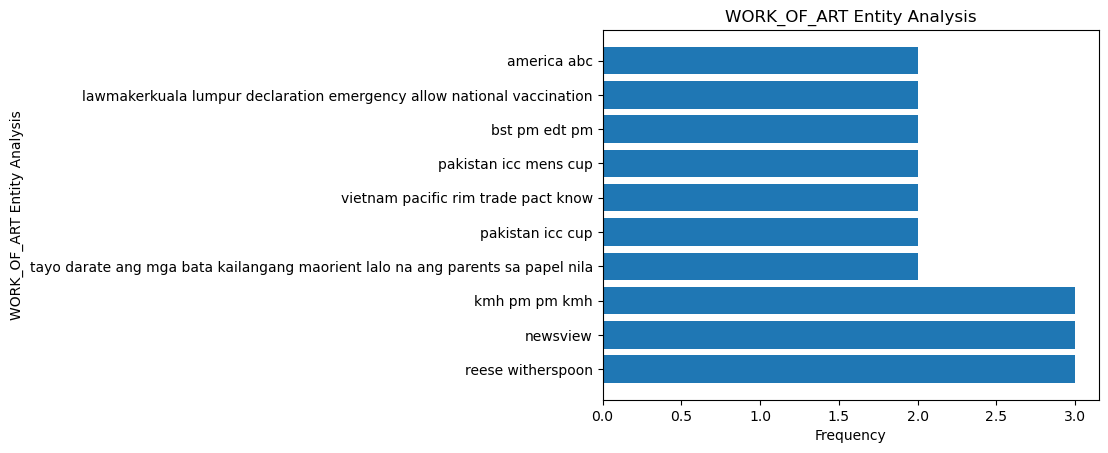

In [213]:
for name_val in df_ner['Label'].unique():
    xdf = pd.DataFrame(df_ner[df_ner['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
    xdf = xdf.rename(columns = {'index':name_val})
    xdf = xdf.rename(columns = {'Text':'frequency'})
    plt.barh(xdf[name_val], xdf.frequency)

    # setting label of y-axis
    plt.ylabel( name_val + " Entity Analysis")

    # setting label of x-axis
    plt.xlabel("Frequency")
    plt.title(name_val + " Entity Analysis")
    plt.show()

In [214]:
word_counter = Counter()
for row in combined_df_clean.to_dict("records"): #converts_to_dictionary
    word_counter.update(row["clean_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf = pd.DataFrame(word_counter.most_common())
df_tf.columns = ["term", "frequency"]
df_tf

,term,frequency
0,say,9192
1,new,8025
2,not,7358
3,covid,5738
4,after,5531
...,...,...
70465,manifestó,1
70466,familia,1
70467,usos,1
70468,costumbre,1


In [215]:
df_tf.head(20)

,term,frequency
0,say,9192
1,new,8025
2,not,7358
3,covid,5738
4,after,5531
5,first,5044
6,full,4157
7,year,3485
8,google,3356
9,make,3354


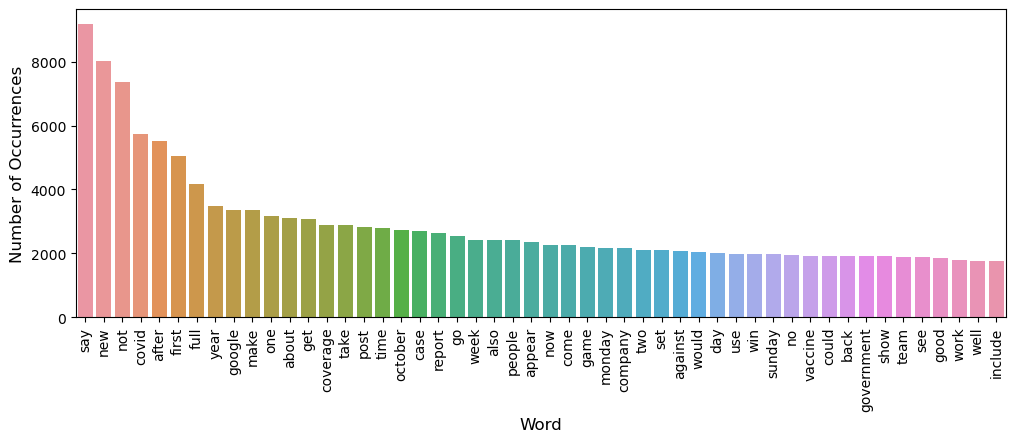

In [216]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf[:50], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

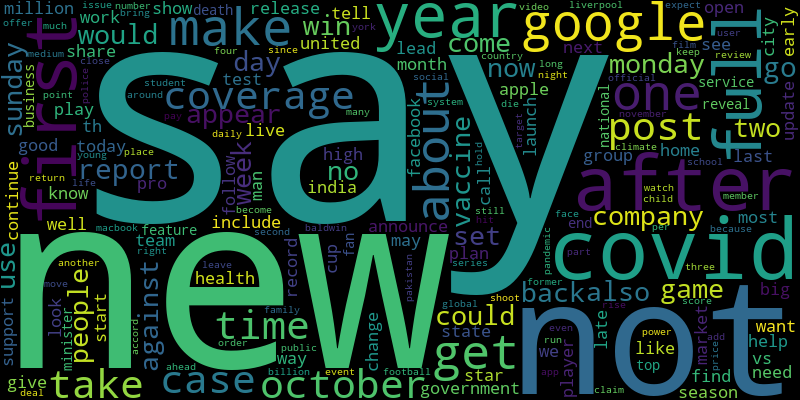

In [217]:
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image = cloud.to_image()
image

In [218]:
documents = [comment.split() for comment in combined_df_clean['clean_title']]
documents

[['apple',
  'release',
  'io',
  'shareplay',
  'camera',
  'option',
  'iphone',
  'proapple',
  'late',
  'os',
  'update',
  'include',
  'miss',
  'io',
  'feature',
  'big',
  'new',
  'feature',
  'return',
  'shareplay',
  'shareplay',
  'feature',
  'originally',
  'suppose',
  'ship',
  'io',
  'allow',
  'people',
  'call',
  'friend',
  'family',
  'watch',
  'movie',
  'tv',
  'listen',
  'music',
  'together'],
 ['smart',
  'park',
  'block',
  'one',
  'company',
  'manage',
  'survive',
  'thrive',
  'pandemicnew',
  'york',
  'october',
  'prnewswire',
  'covid',
  'continue',
  'take',
  'toll',
  'global',
  'economy',
  'company',
  'face',
  'variety',
  'problem',
  'among',
  'most',
  'severe',
  'challenge',
  'strain',
  'cash',
  'flow',
  'disruption',
  'supply',
  'chain',
  'pressure',
  'prolong',
  'pandemic'],
 ['covid',
  'website',
  'create',
  'science',
  'technology',
  'innovation',
  'ministry',
  'no',
  'cost',
  'say',
  'dr',
  'adhamkuala'

In [219]:
 #tokenizing_the_words
vocab = corpora.Dictionary(documents) #creating_dictionaries
vocab

In [220]:

corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 3),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1)],
 [(31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(38, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 2),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 

In [221]:

num_topics = 20
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
print(lda.print_topics())

[(0, '0.009*"new" + 0.006*"not" + 0.005*"post" + 0.005*"first" + 0.004*"say" + 0.004*"covid" + 0.004*"full" + 0.003*"share" + 0.003*"apple" + 0.003*"show"'), (1, '0.012*"new" + 0.008*"covid" + 0.006*"say" + 0.005*"report" + 0.005*"pro" + 0.005*"not" + 0.004*"case" + 0.004*"full" + 0.004*"make" + 0.003*"get"'), (2, '0.007*"new" + 0.007*"not" + 0.006*"say" + 0.005*"after" + 0.004*"first" + 0.004*"covid" + 0.004*"one" + 0.003*"baldwin" + 0.003*"post" + 0.003*"full"'), (3, '0.007*"say" + 0.005*"covid" + 0.005*"not" + 0.005*"new" + 0.004*"after" + 0.004*"october" + 0.004*"take" + 0.003*"launch" + 0.003*"first" + 0.003*"government"'), (4, '0.008*"say" + 0.006*"not" + 0.005*"covid" + 0.005*"first" + 0.005*"make" + 0.004*"after" + 0.004*"post" + 0.004*"new" + 0.004*"year" + 0.003*"two"'), (5, '0.008*"not" + 0.008*"say" + 0.004*"covid" + 0.004*"one" + 0.004*"about" + 0.004*"first" + 0.003*"go" + 0.003*"people" + 0.003*"get" + 0.003*"come"'), (6, '0.006*"say" + 0.005*"after" + 0.004*"new" + 0.00

In [222]:
# Alternatively, format topics as sentences
formatted_topics = [f"Topic {idx + 1}: " + " ".join([word for word, _ in lda.show_topic(idx, topn=10)]) for idx in range(num_topics)]
for topic in formatted_topics:
    print(topic)

Topic 1: new not post first say covid full share apple show
Topic 2: new covid say report pro not case full make get
Topic 3: new not say after first covid one baldwin post full
Topic 4: say covid not new after october take launch first government
Topic 5: say not covid first make after post new year two
Topic 6: not say covid one about first go people get come
Topic 7: say after new covid first liverpool united full man not
Topic 8: say new covid not report after year first play health
Topic 9: after first full new say not google united time coverage
Topic 10: after say new not first post about now get google
Topic 11: not say after first week people new watch go october
Topic 12: new say not first year full live against after week
Topic 13: say covid after new full google one not coverage monday
Topic 14: say new covid not case october also first report vaccine
Topic 15: new say covid after not full make first coverage google
Topic 16: say first make new not covid apple after week ab

In [51]:
#Analysis of word associations/correlations

In [223]:
def get_top_n_bigram(corpus, n=None, grams = 2):
    vec = CountVectorizer(ngram_range=(grams, grams), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [224]:
for range_val in range(2,6):
    common_words = get_top_n_bigram(combined_df_clean['clean_title'], 10,range_val)
    print("Top 10 Word Association - " + str(range_val) + " grams in All comments")
    counter_val = 0
    for word, freq in common_words:
        print(str(counter_val) + ". '" + word + "' : with Frequency - " + str(freq))
        counter_val = counter_val + 1
    print("-"*40)

Top 10 Word Association - 2 grams in All comments
0. 'coverage google' : with Frequency - 2795
1. 'covid case' : with Frequency - 793
2. 'covid vaccine' : with Frequency - 746
3. 'macbook pro' : with Frequency - 727
4. 'october prnewswire' : with Frequency - 693
5. 'new york' : with Frequency - 584
6. 'alec baldwin' : with Frequency - 579
7. 'manchester united' : with Frequency - 564
8. 'social medium' : with Frequency - 454
9. 'test positive' : with Frequency - 453
----------------------------------------
Top 10 Word Association - 3 grams in All comments
0. 'newsview coverage google' : with Frequency - 339
1. 'test positive covid' : with Frequency - 321
2. 'new covid case' : with Frequency - 307
3. 'james michael tyler' : with Frequency - 285
4. 'ole gunnar solskjaer' : with Frequency - 266
5. 'new macbook pro' : with Frequency - 194
6. 'sheeran test positive' : with Frequency - 191
7. 'report new covid' : with Frequency - 158
8. 'hesitant vaccinate kids' : with Frequency - 151
9. 'va

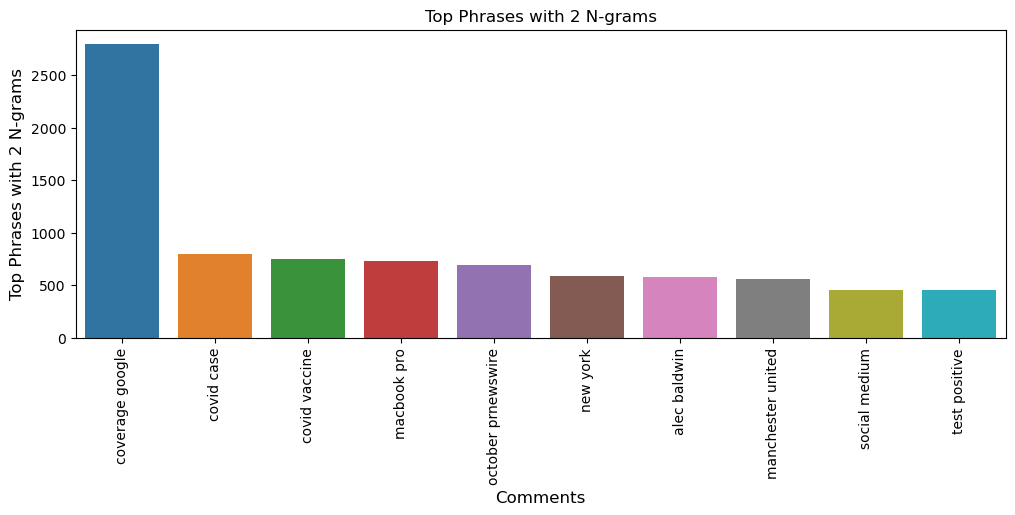

In [225]:
common_words = get_top_n_bigram(combined_df_clean['clean_title'], 10,2)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
plt.figure(figsize=(12,4))
sns.barplot(data=df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).reset_index(), x='cleaned_question', y='count') #plot only the top 10 by slicing the df
plt.ylabel('Top Phrases with 2 N-grams', fontsize=12)
plt.title('Top Phrases with 2 N-grams', fontsize=12)
plt.xlabel('Comments', fontsize=12)
plt.xticks(rotation=90)
plt.show()

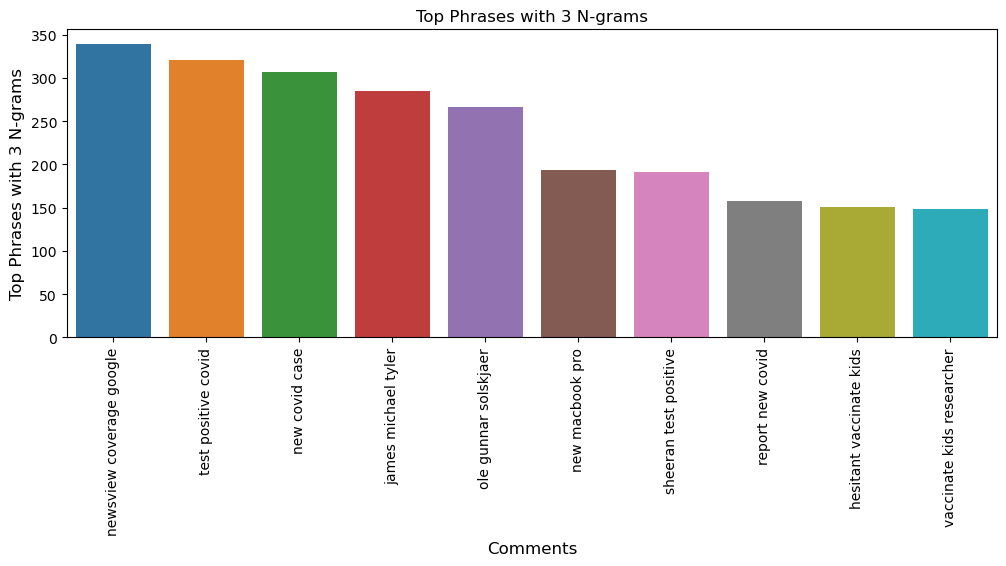

In [226]:
common_words = get_top_n_bigram(combined_df_clean['clean_title'], 10,3)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
plt.figure(figsize=(12,4))
sns.barplot(data=df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).reset_index(), x='cleaned_question', y='count') #plot only the top 10 by slicing the df
plt.ylabel('Top Phrases with 3 N-grams', fontsize=12)
plt.title('Top Phrases with 3 N-grams', fontsize=12)
plt.xlabel('Comments', fontsize=12)
plt.xticks(rotation=90)
plt.show()

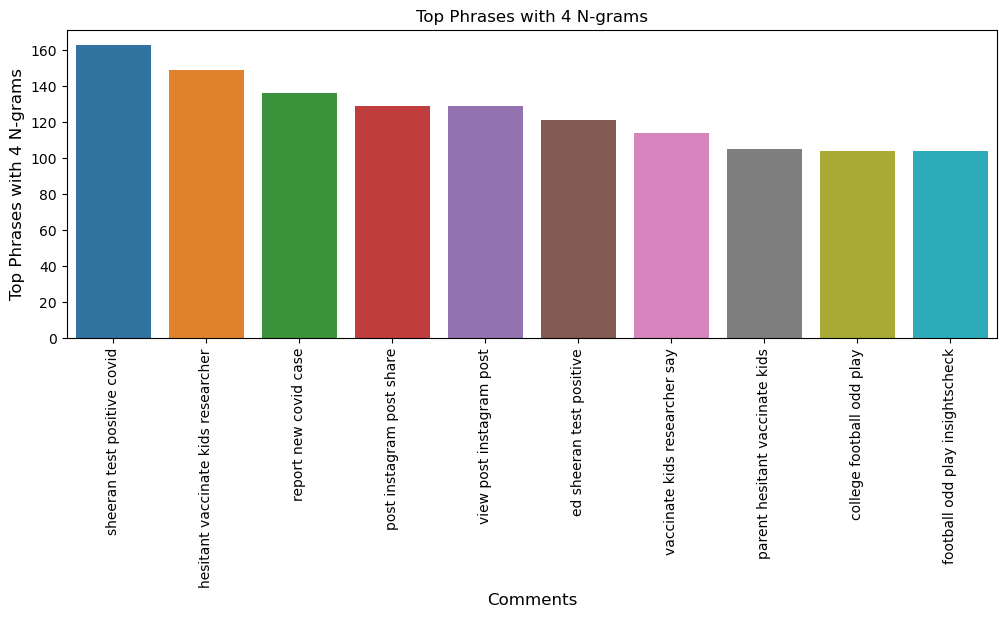

In [227]:
common_words = get_top_n_bigram(combined_df_clean['clean_title'], 10,4)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
plt.figure(figsize=(12,4))
sns.barplot(data=df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).reset_index(), x='cleaned_question', y='count') #plot only the top 10 by slicing the df
plt.ylabel('Top Phrases with 4 N-grams', fontsize=12)
plt.title('Top Phrases with 4 N-grams', fontsize=12)
plt.xlabel('Comments', fontsize=12)
plt.xticks(rotation=90)
plt.show()

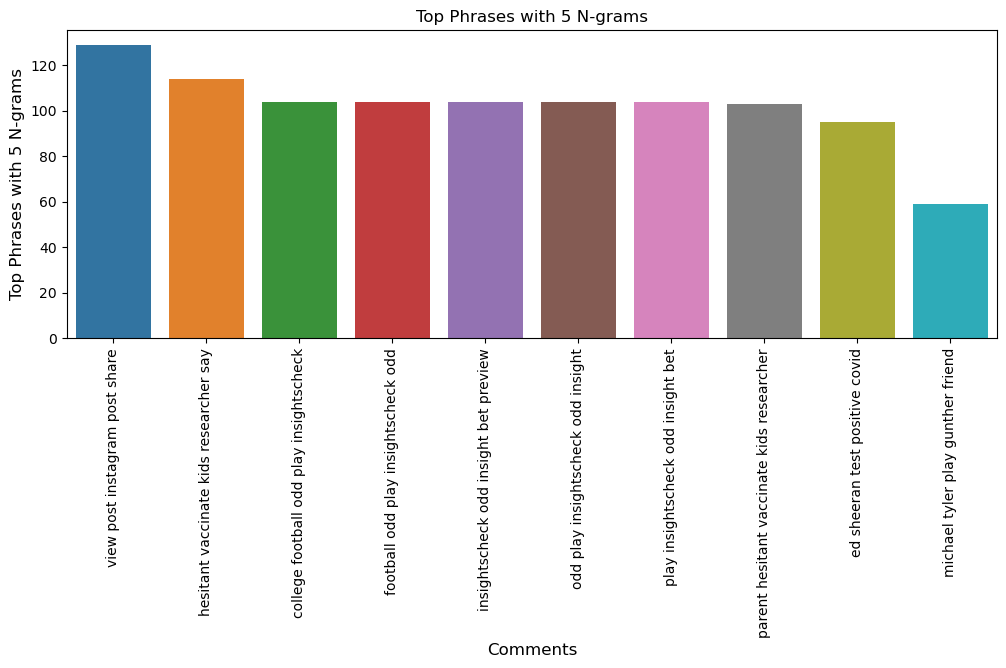

In [228]:
common_words = get_top_n_bigram(combined_df_clean['clean_title'], 10,5)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
plt.figure(figsize=(12,4))
sns.barplot(data=df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).reset_index(), x='cleaned_question', y='count') #plot only the top 10 by slicing the df
plt.ylabel('Top Phrases with 5 N-grams', fontsize=12)
plt.title('Top Phrases with 5 N-grams', fontsize=12)
plt.xlabel('Comments', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [229]:
combined_df_clean.columns

Index(['title', 'description', 'pubDate', 'source_id', 'Source_file',
       'Processing_date', 'combined', 'clean_title', 'language'],
      dtype='object')

In [230]:
combined_df_clean.head()

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title,language
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35,Apple releases iOS 15.1 with SharePlay and mor...,apple release io shareplay camera option iphon...,en
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35,The Smartest Park on the Block: How One Compan...,smart park block one company manage survive th...,en
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35,"Covid-19 website created by Science, Technolog...",covid website create science technology innova...,en
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35,SDMC: Hospital quarantine required for non-Mal...,sdmc hospital quarantine require nonmalaysian ...,en
10,Jab deadline looms for Tas health workers,About one in 10 health workers in Tasmania are...,2021-10-26 06:24:04,perthnow,Covid_News.csv,2024-07-25 22:26:35,Jab deadline looms for Tas health workersAbout...,jab deadline loom tas health workersabout one ...,en


In [231]:
combined_df_clean['pubDate'][2]

Timestamp('2021-10-26 06:35:00')

In [235]:
# from datetime import datetime

# # Example date string
# date_string = combined_df_clean['pubDate'][2]
# date_format = '%d/%m/%Y %H:%M'

# # Convert string to datetime object
# datetime_object = datetime.strptime(date_string, date_format)

# # Print in desired format
# print(datetime_object.strftime('%d/%m/%Y %H:%M'))
# print(datetime_object)


In [236]:
# combined_df_clean[combined_df_clean['pubDate'].apply(len)>16]

In [237]:
sia = SentimentIntensityAnalyzer()
def score_vader(text):
    return sia.polarity_scores(text)["compound"]

In [246]:
print(combined_df_clean['clean_title'].iloc[0])
print(score_vader(combined_df_clean['clean_title'].iloc[0]))
print(combined_df_clean['clean_title'].iloc[1])
print(score_vader(combined_df_clean['clean_title'].iloc[1]))
print(combined_df_clean['clean_title'].iloc[3])
print(score_vader(combined_df_clean['clean_title'].iloc[3]))

apple release io shareplay camera option iphone proapple late os update include miss io feature big new feature return shareplay shareplay feature originally suppose ship io allow people call friend family watch movie tv listen music together
0.5423
smart park block one company manage survive thrive pandemicnew york october prnewswire covid continue take toll global economy company face variety problem among most severe challenge strain cash flow disruption supply chain pressure prolong pandemic
-0.8548
sdmc hospital quarantine require nonmalaysian enter sarawak medical tourismkuching oct nonmalaysians require undergo sevenday quarantine hospital enter sarawak medical tourism purpose even fully vaccinate against covid say update standard operating procedure sop
0.0


In [244]:
combined_df_clean['vader_sentiment'] = combined_df_clean['clean_title'].apply(score_vader)
combined_df_clean.head()

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title,language,vader_sentiment
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35,Apple releases iOS 15.1 with SharePlay and mor...,apple release io shareplay camera option iphon...,en,0.5423
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35,The Smartest Park on the Block: How One Compan...,smart park block one company manage survive th...,en,-0.8548
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35,"Covid-19 website created by Science, Technolog...",covid website create science technology innova...,en,0.5801
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35,SDMC: Hospital quarantine required for non-Mal...,sdmc hospital quarantine require nonmalaysian ...,en,0.0000
10,Jab deadline looms for Tas health workers,About one in 10 health workers in Tasmania are...,2021-10-26 06:24:04,perthnow,Covid_News.csv,2024-07-25 22:26:35,Jab deadline looms for Tas health workersAbout...,jab deadline loom tas health workersabout one ...,en,-0.2263


In [255]:
combined_df_clean.to_csv('combined_df_clean_sentiment.csv')

In [247]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys
def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [248]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))
    return top_words

In [249]:
#number of topics
n_topics = 10

In [253]:
import pandas as pd
import re
import numpy as np

from langdetect import detect

from datetime import datetime
from wordcloud import WordCloud
from collections import Counter

import gensim
import gensim.corpora as corpora


from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

import spacy

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [271]:
# Find Related Topics

Topic 1:  covid new
Topic 2:  case covid
Topic 3:  baldwin gun
Topic 4:  pro apple
Topic 5:  united liverpool
Topic 6:  michael tyler
Topic 7:  cup vs
Topic 8:  test sheeran
Topic 9:  facebook whistleblower
Topic 10:  military sudan


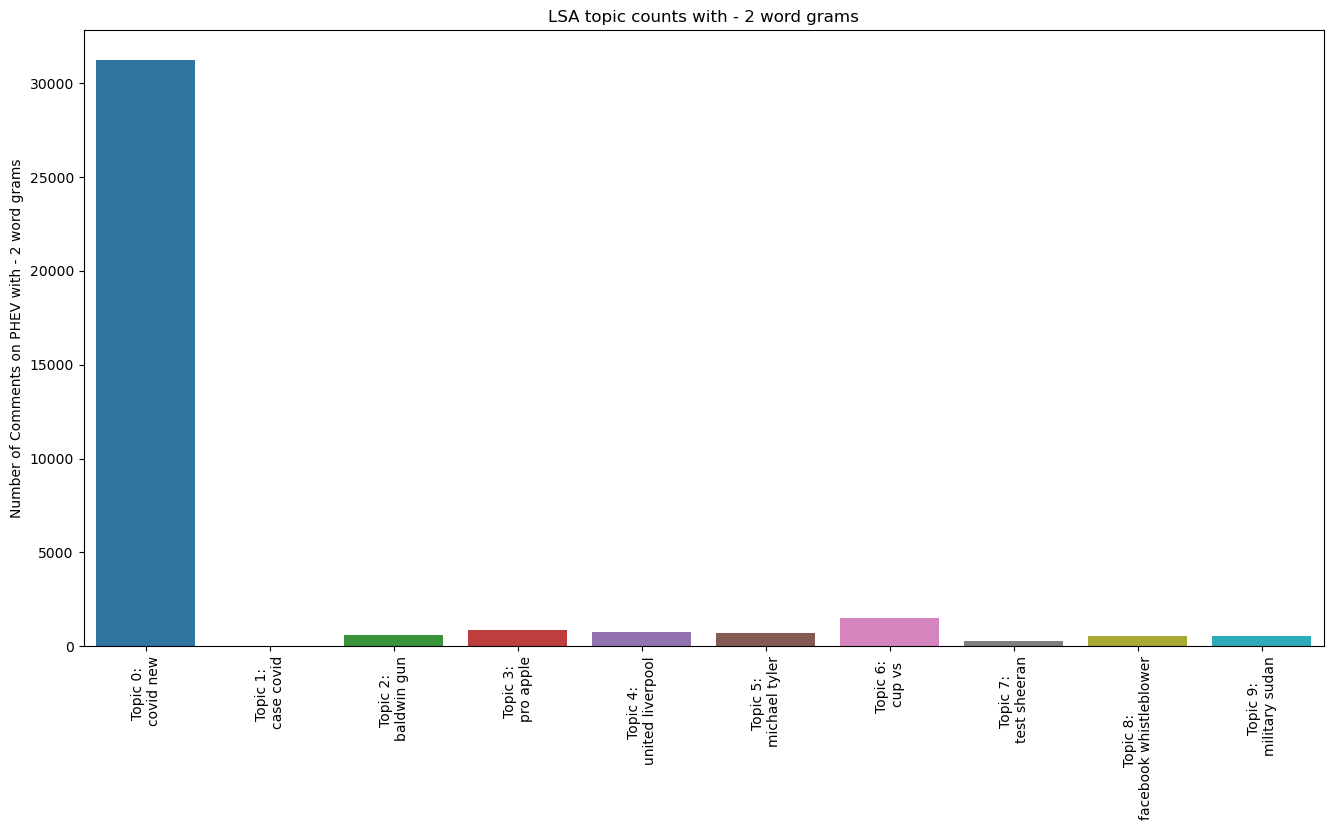

In [254]:

reindexed_data = combined_df_clean['clean_title']
n_words_gram = 2

tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(n_words_gram, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(n_words_gram, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

plt.figure(figsize=(16, 8))
sns.barplot(x=lsa_categories, y=lsa_counts)
plt.xticks(ticks=lsa_categories, labels=labels, rotation=90)
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.ylabel('Number of Comments on PHEV with - ' + str(n_words_gram) + " word grams")
plt.title('LSA topic counts with - ' + str(n_words_gram) + " word grams")
plt.show()

In [256]:
# Add topic columns to DataFrame
for i in range(n_topics):
    combined_df_clean[f'Topic {i+1}'] = pd.NA
combined_df_clean.head()

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title,language,vader_sentiment,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35,Apple releases iOS 15.1 with SharePlay and mor...,apple release io shareplay camera option iphon...,en,0.5423,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35,The Smartest Park on the Block: How One Compan...,smart park block one company manage survive th...,en,-0.8548,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35,"Covid-19 website created by Science, Technolog...",covid website create science technology innova...,en,0.5801,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35,SDMC: Hospital quarantine required for non-Mal...,sdmc hospital quarantine require nonmalaysian ...,en,0.0000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10,Jab deadline looms for Tas health workers,About one in 10 health workers in Tasmania are...,2021-10-26 06:24:04,perthnow,Covid_News.csv,2024-07-25 22:26:35,Jab deadline looms for Tas health workersAbout...,jab deadline loom tas health workersabout one ...,en,-0.2263,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [260]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Find Similarity

In [270]:
# Compute similarity and fill the DataFrame
for idx, row in combined_df_clean.iterrows():
    clean_title = row['clean_title']
#     print(clean_title)
    title_tfidf = tfidf_vectorizer.transform([clean_title])
    similarities = lsa_model.transform(title_tfidf).flatten()
#     print(similarities)
#     title_lsa = lsa_model.transform(title_tfidf)
#     similarities = cosine_similarity(title_lsa, lsa_topic_matrix).flatten()
#     print(similarities)
#     break
    for i in range(n_topics):
        combined_df_clean.at[idx, f'Topic {i+1}'] = similarities[i]
combined_df_clean

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title,language,vader_sentiment,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,2021-10-26 06:43:41,thehansindia,Covid_News.csv,2024-07-25 22:26:35,Apple releases iOS 15.1 with SharePlay and mor...,apple release io shareplay camera option iphon...,en,0.5423,0.116602,-0.079535,-0.030711,0.148558,0.036494,0.050732,-0.022066,-0.000864,0.008354,-0.008829
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",2021-10-26 06:41:00,cision,Covid_News.csv,2024-07-25 22:26:35,The Smartest Park on the Block: How One Compan...,smart park block one company manage survive th...,en,-0.8548,0.116584,0.008518,-0.017313,-0.001954,-0.03799,-0.01543,-0.009876,-0.005939,0.025481,-0.052066
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,2021-10-26 06:35:00,thestar_my,Covid_News.csv,2024-07-25 22:26:35,"Covid-19 website created by Science, Technolog...",covid website create science technology innova...,en,0.5801,0.157523,0.070614,0.011031,-0.041629,-0.056443,-0.016337,-0.049705,0.065241,-0.077268,-0.017731
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",2021-10-26 06:34:00,malaymail,Covid_News.csv,2024-07-25 22:26:35,SDMC: Hospital quarantine required for non-Mal...,sdmc hospital quarantine require nonmalaysian ...,en,0.0000,0.093742,0.044904,0.007394,-0.02289,-0.022853,-0.004865,-0.01836,0.02811,-0.045652,-0.010509
10,Jab deadline looms for Tas health workers,About one in 10 health workers in Tasmania are...,2021-10-26 06:24:04,perthnow,Covid_News.csv,2024-07-25 22:26:35,Jab deadline looms for Tas health workersAbout...,jab deadline loom tas health workersabout one ...,en,-0.2263,0.144747,0.107061,0.019259,-0.043688,-0.025504,-0.008657,-0.03071,0.071256,-0.114716,-0.047093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,"Were amateurs in 2017 MCD polls, situation cha...",Unlike the Municipal Corporation of Delhi (MCD...,2021-10-24 10:48:00,business-standard,World_Politics_News.csv,2024-07-25 22:26:35,"Were amateurs in 2017 MCD polls, situation cha...",amateur mcd poll situation change now aapunlik...,en,0.4019,0.037293,-0.014391,-0.008133,-0.013534,-0.026465,-0.004628,-0.003327,-0.001802,-0.005293,0.011771
2895,"Un gobierno que gestiona cómodo y sin presión,...",NaN,2021-10-24 10:19:01,mdzol,World_Politics_News.csv,2024-07-25 22:26:35,NaN,,unknown,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,McGowan security scare: Person taking photogra...,New details surrounding the scare which prompt...,2021-10-24 10:05:00,thewest,World_Politics_News.csv,2024-07-25 22:26:35,McGowan security scare: Person taking photogra...,mcgowan security scare person take photograph ...,en,-0.1779,0.034363,-0.02201,-0.001718,-0.008201,-0.008248,0.000984,-0.007742,-0.003446,0.010072,0.002999
2915,Transition to electric vehicles ‘won’t happen ...,Australia needs to start the switch to electri...,2021-10-24 10:00:00,smh,World_Politics_News.csv,2024-07-25 22:26:35,Transition to electric vehicles ‘won’t happen ...,transition electric vehicle not happen overnig...,en,0.0000,0.092597,-0.039482,-0.034053,0.010131,-0.059744,-0.01779,-0.010814,-0.001891,-0.002217,-0.045613


In [269]:
for each in similarities:
    print(each)

0.11660200494569778
-0.07953516397138877
-0.030710609155371906
0.14855835908222587
0.03649397303237205
0.0507322103942508
-0.02206587549540452
-0.0008638900524340115
0.008353765438027301
-0.008829097406880228


In [272]:
# combined_df_clean.to_csv('combined_df_clean_sim.csv')

In [ ]:

# # Compute similarity and fill the DataFrame
# for idx, row in combined_df_clean.iterrows():
#     clean_title = row['clean_title']
#     title_tfidf = tfidf_vectorizer.transform([clean_title])
#     similarities = cosine_similarity(title_tfidf, lsa_topic_matrix).flatten()
#     for i in range(n_topics):
#         combined_df_clean.at[idx, f'Topic {i+1}'] = similarities[i]

In [326]:
combined_df_clean = pd.read_csv('combined_df_clean_sim - Copy.csv')
combined_df_clean = combined_df_clean[['title', 'description', 'pubDate', 'source_id',
       'Source_file', 'Processing_date', 'combined', 'clean_title', 'language',
       'vader_sentiment', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4',
       'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10']]
combined_df_clean

,title,description,pubDate,source_id,Source_file,Processing_date,combined,clean_title,language,vader_sentiment,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,Apple releases iOS 15.1 with SharePlay and mor...,Apple's latest OS update includes a missing iO...,01/09/2017,thehansindia,Covid_News.csv,25/07/2024 22:26,Apple releases iOS 15.1 with SharePlay and mor...,apple release io shareplay camera option iphon...,en,0.5423,0.116602,-0.079535,-0.030711,0.148558,0.036494,0.050732,-0.022066,-0.000864,0.008354,-0.008829
1,The Smartest Park on the Block: How One Compan...,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",05/09/2017,cision,Covid_News.csv,25/07/2024 22:26,The Smartest Park on the Block: How One Compan...,smart park block one company manage survive th...,en,-0.8548,0.116584,0.008518,-0.017313,-0.001954,-0.037990,-0.015430,-0.009876,-0.005939,0.025481,-0.052066
2,"Covid-19 website created by Science, Technolog...",KUALA LUMPUR: The website for AstraZeneca Covi...,06/09/2017,thestar_my,Covid_News.csv,25/07/2024 22:26,"Covid-19 website created by Science, Technolog...",covid website create science technology innova...,en,0.5801,0.157523,0.070614,0.011031,-0.041629,-0.056443,-0.016337,-0.049705,0.065241,-0.077268,-0.017731
3,SDMC: Hospital quarantine required for non-Mal...,"KUCHING, Oct 26 — Non-Malaysians are required ...",07/09/2017,malaymail,Covid_News.csv,25/07/2024 22:26,SDMC: Hospital quarantine required for non-Mal...,sdmc hospital quarantine require nonmalaysian ...,en,0.0000,0.093742,0.044904,0.007394,-0.022890,-0.022853,-0.004865,-0.018360,0.028110,-0.045652,-0.010509
4,Jab deadline looms for Tas health workers,About one in 10 health workers in Tasmania are...,08/09/2017,perthnow,Covid_News.csv,25/07/2024 22:26,Jab deadline looms for Tas health workersAbout...,jab deadline loom tas health workersabout one ...,en,-0.2263,0.144747,0.107061,0.019259,-0.043688,-0.025504,-0.008657,-0.030710,0.071256,-0.114716,-0.047093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37034,"Were amateurs in 2017 MCD polls, situation cha...",Unlike the Municipal Corporation of Delhi (MCD...,31/10/2017,business-standard,World_Politics_News.csv,25/07/2024 22:26,"Were amateurs in 2017 MCD polls, situation cha...",amateur mcd poll situation change now aapunlik...,en,0.4019,0.037293,-0.014391,-0.008133,-0.013534,-0.026465,-0.004628,-0.003327,-0.001802,-0.005293,0.011771
37035,"Un gobierno que gestiona cómodo y sin presión,...",NaN,01/11/2017,mdzol,World_Politics_News.csv,25/07/2024 22:26,NaN,NaN,unknown,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37036,McGowan security scare: Person taking photogra...,New details surrounding the scare which prompt...,02/11/2017,thewest,World_Politics_News.csv,25/07/2024 22:26,McGowan security scare: Person taking photogra...,mcgowan security scare person take photograph ...,en,-0.1779,0.034363,-0.022010,-0.001718,-0.008201,-0.008248,0.000984,-0.007742,-0.003446,0.010072,0.002999
37037,Transition to electric vehicles ‘won’t happen ...,Australia needs to start the switch to electri...,03/11/2017,smh,World_Politics_News.csv,25/07/2024 22:26,Transition to electric vehicles ‘won’t happen ...,transition electric vehicle not happen overnig...,en,0.0000,0.092597,-0.039482,-0.034053,0.010131,-0.059744,-0.017790,-0.010814,-0.001891,-0.002217,-0.045613


In [327]:
# List of topic columns (assuming you know the names of these columns)
# topic_columns = [col for col in combined_df_clean.columns if col.startswith('Topic ')]
topic_columns = ['vader_sentiment', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4',
       'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10']
topic_columns

['vader_sentiment',
 'Topic 1',
 'Topic 2',
 'Topic 3',
 'Topic 4',
 'Topic 5',
 'Topic 6',
 'Topic 7',
 'Topic 8',
 'Topic 9',
 'Topic 10']

In [328]:
news_grouped_df  = combined_df_clean.groupby('pubDate')[topic_columns].mean().reset_index()
news_grouped_df

,pubDate,vader_sentiment,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,01/02/2018,-0.048914,0.050084,-0.014227,0.008682,0.007512,-0.003226,-0.000405,-0.005137,0.002754,0.000710,0.003418
1,01/02/2019,-0.003160,0.060263,-0.032320,-0.011557,0.007529,-0.006500,-0.007644,-0.006685,-0.002299,0.001112,-0.002661
2,01/03/2018,0.141763,0.059151,-0.016606,-0.011695,-0.000222,-0.008408,-0.005911,-0.005319,-0.002086,0.002808,-0.001882
3,01/03/2019,-0.077011,0.048428,-0.015954,-0.003765,-0.005090,0.000587,-0.003145,-0.004821,0.001464,-0.003187,0.005604
4,01/04/2019,0.042544,0.054011,-0.013569,-0.009005,-0.009036,-0.002203,0.018087,-0.007735,0.017143,0.002765,0.002765
...,...,...,...,...,...,...,...,...,...,...,...,...
644,31/10/2017,0.021559,0.053194,-0.031649,-0.010734,0.010155,-0.001001,0.000722,0.004751,0.006497,0.000605,-0.002180
645,31/10/2018,0.208702,0.050501,-0.017993,-0.010324,-0.000141,-0.011551,0.002260,0.003431,0.007988,0.017849,-0.005817
646,31/10/2019,0.077953,0.052196,-0.019469,-0.011639,0.006771,-0.002295,0.002313,0.004222,0.000919,-0.007223,0.008037
647,31/12/2018,0.181109,0.053796,-0.014255,-0.012892,-0.007601,-0.004400,-0.004375,0.002045,-0.005184,-0.001958,0.010430


In [329]:
stocks_df = pd.read_csv(r"C:\Users\PRAGYA\MSC Project\stocks\combined_stocks.csv")
stocks_df.dropna(inplace=True)
stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume,Source File,Processing Date
0,01/09/2017,13.200000,13.270000,13.200000,13.270000,13.270000,22000,BAR.csv,21/06/2024 13:52
1,05/09/2017,13.698000,14.107000,13.365000,13.440400,13.440400,33000,BAR.csv,21/06/2024 13:52
2,06/09/2017,13.421000,13.421000,13.365000,13.365000,13.365000,17000,BAR.csv,21/06/2024 13:52
3,07/09/2017,13.500000,13.500000,13.487000,13.487000,13.487000,11000,BAR.csv,21/06/2024 13:52
4,08/09/2017,13.872000,14.287000,13.481300,13.497300,13.497300,27000,BAR.csv,21/06/2024 13:52
...,...,...,...,...,...,...,...,...,...
29666,26/03/2020,60.160000,60.750000,51.779999,53.730000,53.730000,1922100,AMN.csv,21/06/2024 13:52
29667,27/03/2020,52.790001,53.000000,48.009998,48.279999,48.279999,1066900,AMN.csv,21/06/2024 13:52
29668,30/03/2020,48.869999,52.730000,48.160000,52.340000,52.340000,880600,AMN.csv,21/06/2024 13:52
29669,31/03/2020,52.709999,58.310001,51.950001,57.810001,57.810001,1168100,AMN.csv,21/06/2024 13:52


In [330]:
stocks_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Source File', 'Processing Date'],
      dtype='object')

In [321]:
# stocks_df['Date'] = pd.to_datetime(stocks_df['Date'], format='%d/%m/%Y').dt.date

In [331]:
stocks_columns= ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [332]:
stocks_grouped_df = stocks_df.groupby('Date')[stocks_columns].mean().reset_index()
stocks_grouped_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/02/1982,1.437500,1.437500,1.437500,1.437500,1.061253,0.000000
1,01/02/1983,0.000000,2.000000,1.875000,1.875000,1.384244,600.000000
2,01/02/1984,0.000000,2.562500,2.437500,2.437500,1.799516,400.000000
3,01/02/1985,1.000000,1.125000,1.000000,1.000000,0.738263,200.000000
4,01/02/1988,3.125000,3.125000,3.125000,3.125000,2.307073,6000.000000
...,...,...,...,...,...,...,...
10093,31/12/2013,21.115000,21.368333,20.808333,21.111667,19.408508,139766.666667
10094,31/12/2014,23.441667,24.360000,23.325000,23.843333,22.459086,162500.000000
10095,31/12/2015,20.558333,20.856667,20.140000,20.303333,19.290402,159916.666667
10096,31/12/2018,25.369714,25.735857,24.705071,25.498257,25.216922,183671.428571


In [333]:
stocks_grouped_df['Date'] = pd.to_datetime(stocks_df['Date'], format='%d/%m/%Y').dt.date

In [334]:
# Convert date columns to datetime format
news_grouped_df['pubDate'] = pd.to_datetime(news_grouped_df['pubDate'], format='%d/%m/%Y').dt.date

In [337]:
# Merge DataFrames on the date column
merged_df = pd.merge(stocks_grouped_df, news_grouped_df, left_on='Date', right_on='pubDate', how='inner')
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,pubDate,vader_sentiment,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,2017-09-01,1.437500,1.437500,1.437500,1.437500,1.061253,0.000000,2017-09-01,0.114322,0.048431,-0.030520,-0.005086,0.000348,0.000044,-0.001203,0.007288,-0.000564,-0.000144,-0.002982
1,2017-09-01,85.663747,85.732497,80.368750,82.232503,82.160932,19900.000000,2017-09-01,0.114322,0.048431,-0.030520,-0.005086,0.000348,0.000044,-0.001203,0.007288,-0.000564,-0.000144,-0.002982
2,2017-09-01,26.627000,26.840428,26.058471,26.462286,26.125694,103800.000000,2017-09-01,0.114322,0.048431,-0.030520,-0.005086,0.000348,0.000044,-0.001203,0.007288,-0.000564,-0.000144,-0.002982
3,2017-09-05,0.000000,2.000000,1.875000,1.875000,1.384244,600.000000,2017-09-05,0.065745,0.039547,-0.014337,-0.008002,-0.008279,-0.010233,0.007791,-0.001026,-0.007067,0.000094,-0.003607
4,2017-09-05,59.934999,60.442500,57.166248,58.196250,58.091431,73025.000000,2017-09-05,0.065745,0.039547,-0.014337,-0.008002,-0.008279,-0.010233,0.007791,-0.001026,-0.007067,0.000094,-0.003607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,2020-04-01,104.136249,106.731252,99.893750,103.481247,103.457880,22350.000000,2020-04-01,0.106632,0.043333,-0.022288,-0.000267,0.011407,-0.008085,-0.002721,-0.001475,-0.004245,0.001442,-0.002153
2420,2020-04-01,27.915000,28.732500,27.145000,27.472500,27.386277,173125.000000,2020-04-01,0.106632,0.043333,-0.022288,-0.000267,0.011407,-0.008085,-0.002721,-0.001475,-0.004245,0.001442,-0.002153
2421,2020-04-01,27.455714,28.147714,27.407143,27.810429,27.517891,266800.000000,2020-04-01,0.106632,0.043333,-0.022288,-0.000267,0.011407,-0.008085,-0.002721,-0.001475,-0.004245,0.001442,-0.002153
2422,2020-04-01,142.056666,142.990000,136.190002,141.323333,141.288794,12166.666667,2020-04-01,0.106632,0.043333,-0.022288,-0.000267,0.011407,-0.008085,-0.002721,-0.001475,-0.004245,0.001442,-0.002153


In [338]:
# Select features for forecasting
features = ['vader_sentiment', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4',
            'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10',
           'High', 'Low', 'Close', 'Adj Close', 'Volume']
target = 'Open'

In [339]:
# Ensure no missing values in features
merged_df = merged_df.dropna(subset=features)


In [341]:
# !pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 682.7 kB/s eta 0:00:01
   - ------------------------------------- 30.7/614.7 kB 330.3 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 469.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/614.7 kB 656.4 kB/s eta 0:00:01
   --------- ---------------------------- 153.6/614.7 kB 706.2 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/614.7 kB 778.2 kB/s eta 0:00:01
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [342]:
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split

In [343]:
# Train-test split
train_df, test_df = train_test_split(merged_df, test_size=0.2, shuffle=False)

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [344]:
# Fit AutoARIMA model
model = auto_arima(y_train, exogenous=X_train, seasonal=False, stepwise=True, suppress_warnings=True)

# Make predictions
predictions = model.predict(n_periods=len(X_test), exogenous=X_test)

# Combine the predictions with the test set for comparison
results = test_df.copy()
results['Predicted_Open'] = predictions

print(results[['Date', 'Open', 'Predicted_Open']])

            Date        Open  Predicted_Open
1939  2019-11-12    1.000000       28.739410
1940  2019-11-12    2.125000       33.121729
1941  2019-11-12   39.112500       36.828354
1942  2019-11-12    4.875000       43.301629
1943  2019-11-12   52.640001       29.722426
...          ...         ...             ...
2419  2020-04-01  104.136249       24.611017
2420  2020-04-01   27.915000       23.990092
2421  2020-04-01   27.455714       23.960687
2422  2020-04-01  142.056666       24.608204
2423  2020-04-01    0.000000       23.907656

[485 rows x 3 columns]


In [345]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate error metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1718.8523087932992
Mean Absolute Error: 26.259442002102087


In [349]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [350]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Mean Absolute Scaled Error (MASE)
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    naive_forecast = y_train.shift(1).fillna(y_train.mean())
    mae_naive = mean_absolute_error(y_train[1:], naive_forecast[1:])
    mae_model = mean_absolute_error(y_true, y_pred)
    return mae_model / mae_naive

# Actual vs Predicted
y_true = y_test
y_pred = predictions

In [351]:
# Compute accuracy metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mase = mean_absolute_scaled_error(y_true, y_pred, y_train)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'R-Squared (R²): {r2}')
print(f'Mean Absolute Scaled Error (MASE): {mase}')

Mean Squared Error (MSE): 1718.8523087932992
Mean Absolute Error (MAE): 26.259442002102087
Root Mean Squared Error (RMSE): 41.45904375155437
Mean Absolute Percentage Error (MAPE): inf%
R-Squared (R²): -0.014851929809121867
Mean Absolute Scaled Error (MASE): 0.6926143031763756


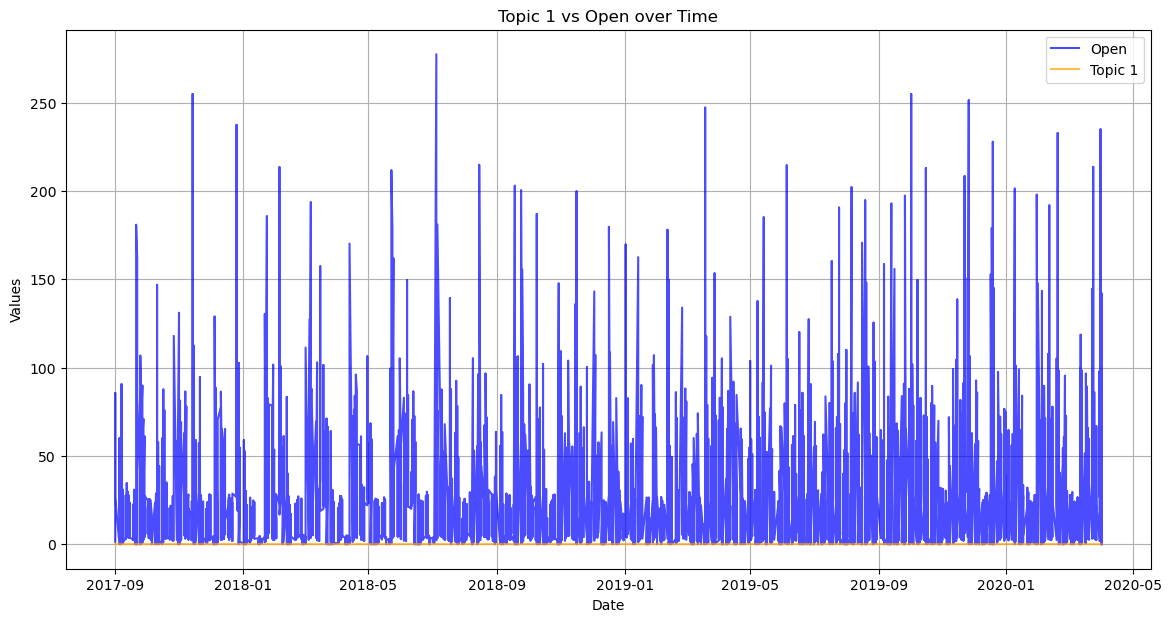

In [353]:
# Plot Topic 1 vs Open over time
plt.figure(figsize=(14, 7))

# Plot 'Open' values
plt.plot(merged_df['Date'], merged_df['Open'], label='Open', color='blue', alpha=0.7)

# Plot 'Topic 1' values (scaled to fit in the same plot)
plt.plot(merged_df['Date'], merged_df['Topic 1'], label='Topic 1', color='orange', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Topic 1 vs Open over Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


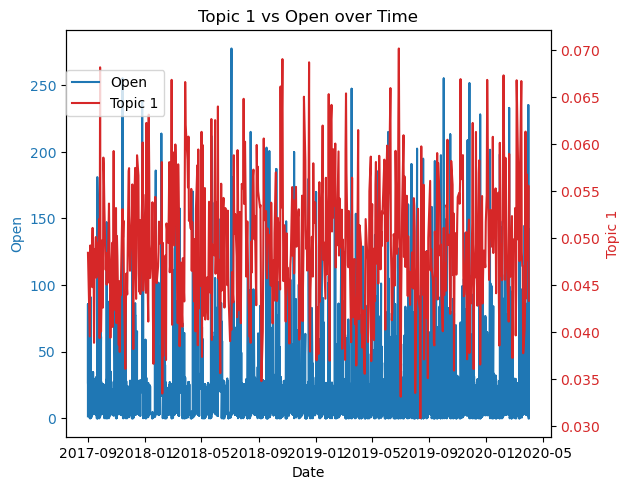

In [354]:
# Plot the data
fig, ax1 = plt.subplots()

# Plot 'Open' values on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Open', color='tab:blue')
ax1.plot(merged_df['Date'], merged_df['Open'], color='tab:blue', label='Open')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot 'Topic 1' values
ax2 = ax1.twinx()  
ax2.set_ylabel('Topic 1', color='tab:red')
ax2.plot(merged_df['Date'], merged_df['Topic 1'], color='tab:red', label='Topic 1')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
fig.tight_layout()  
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.title('Topic 1 vs Open over Time')
plt.show()

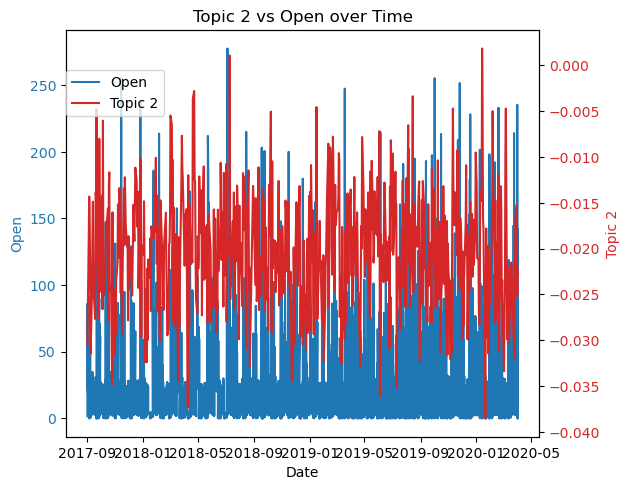

In [355]:
# Plot the data
fig, ax1 = plt.subplots()

# Plot 'Open' values on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Open', color='tab:blue')
ax1.plot(merged_df['Date'], merged_df['Open'], color='tab:blue', label='Open')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot 'Topic 1' values
ax2 = ax1.twinx()  
ax2.set_ylabel('Topic 2', color='tab:red')
ax2.plot(merged_df['Date'], merged_df['Topic 2'], color='tab:red', label='Topic 2')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
fig.tight_layout()  
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Display the plot
plt.title('Topic 2 vs Open over Time')
plt.show()

In [274]:
combined_df_clean.columns

Index(['Unnamed: 0', 'title', 'description', 'pubDate', 'source_id',
       'Source_file', 'Processing_date', 'combined', 'clean_title', 'language',
       'vader_sentiment', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4',
       'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10'],
      dtype='object')

In [199]:
combined_df_clean['pubDate'][2208]

'2021-10-25 19:27:30'

In [234]:
# combined_df_clean['pubDate'] = combined_df_clean['pubDate'].apply(lambda x:  datetime.strptime(x, date_format))
# combined_df_clean['pubDate'] = pd.to_datetime(combined_df_clean['pubDate'])

<Axes: title={'center': 'news posted over time'}, xlabel='date', ylabel='comments'>

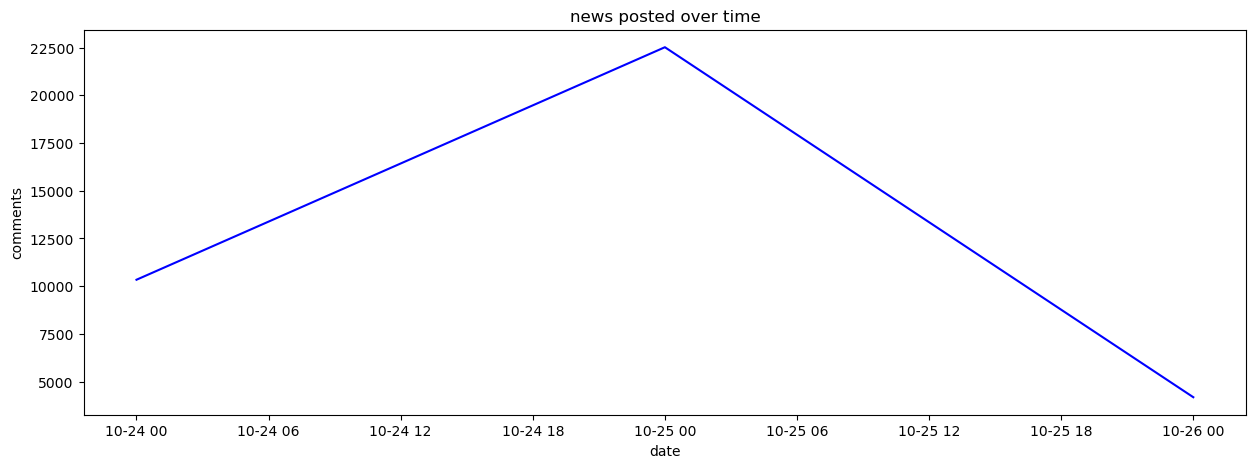

In [232]:
combined_df_clean.groupby(combined_df_clean["pubDate"].dt.date).size().plot(figsize=(15, 5),
    title="news posted over time",ylabel="comments", xlabel="date", color="b")

In [233]:
combined_df_clean['pubDate'].dt.date.unique()

array([datetime.date(2021, 10, 26), datetime.date(2021, 10, 25),
       datetime.date(2021, 10, 24)], dtype=object)

In [3]:
#Run from here-->

In [47]:
# combined_df_clean= pd.read_csv(r'C:\Users\PRAGYA\MSC Project\news\clean_title_df.csv')

In [ ]:
topics = df_tf['term'].tolist()

# Determine the number of topics
num_topics = len(topics)

# Add new columns for each topic in the news DataFrame with NaN values
for i, topic in enumerate(topics):
    combined_df_clean[f'Topic {i+1}'] = pd.NA

# Save the updated DataFrame back to the CSV file
combined_df_clean.to_csv(r'C:\Users\PRAGYA\MSC Project\news\added_topics.csv', index=False)

print("Topics added to each news item in the CSV file successfully.")

In [24]:
df_tf.head(25)

,term,frequency
0,covid,3259
1,new,2693
2,say,2046
3,news,1348
4,world,1348
5,win,1209
6,vs,1109
7,case,1046
8,report,895
9,cup,885


In [37]:
# Ensure the column names are correct
if 'term' in df_tf.columns and 'frequency' in df_tf.columns:
    # Sort topics by frequency in descending order and select the top 15
    top_topics_df = df_tf.sort_values(by='frequency', ascending=False).head(15)
    
    # Extract the top 10 topics
    top_topics = top_topics_df['term'].tolist()
    
    # Load NLTK stopwords
    stop_words = set(stopwords.words('english'))
    
    # Define your custom stopwords
    custom_stopwords = {'new', 'news', 'say', 'time','vs','case','world','win'}  # Add your custom stopwords here
    
     # Combine NLTK stopwords with custom stopwords
    all_stopwords = stop_words.union(custom_stopwords)
    
    def remove_stopwords_and_adjust_list(topics, stop_words):
        adjusted_topics = []
        for topic in topics:
            words = topic.split()
            filtered_words = [word for word in words if word.lower() not in stop_words]
            if filtered_words:
                adjusted_topics.append(' '.join(filtered_words))
        return adjusted_topics
    
    # Apply stopwords removal and list adjustment
    cleaned_topics = remove_stopwords_and_adjust_list(top_topics, all_stopwords)
    
    # Ensure the list has exactly 10 topics (fill with NaN if less)
    while len(cleaned_topics) < 10:
        cleaned_topics.append(pd.NA)
    
    # Save the cleaned topics to a new DataFrame
    cleaned_topics_df = pd.DataFrame(cleaned_topics, columns=['cleaned_term'])
    
    # Save the cleaned topics to a new CSV file
    #cleaned_topics_df.to_csv(r'C:\Users\PRAGYA\MSC Project\news\cleaned_topics.csv', index=False)
    
    print("Cleaned topics saved successfully.")
else:
    print("The 'term' or 'frequency' column is not found in df_tf. Please check the column names.")

Cleaned topics saved successfully.


In [38]:
cleaned_topics_df

,cleaned_term
0,covid
1,report
2,cup
3,live
4,star
5,first
6,man
7,united
8,<NA>
9,<NA>


In [48]:
combined_df_clean.head()

,Unnamed: 0,index,title,link,keywords,creator,video_url,description,content,pubDate,full_description,image_url,source_id,Source_file,Processing_date,clean_title,language
0,2,2,LOOK: Megan Thee Stallionâs college graduati...,https://www.hitc.com/en-gb/2021/10/26/megan-th...,"['Trending', 'college', 'graduation ceremony',...",['Disha Kandpal'],NaN,Megan Thee Stallion is giving us all some much...,Megan Thee Stallion is giving us all some much...,2021-10-26 06:52:00,NaN,NaN,hitc,Covid_and_Vaccine_News.csv,2024-07-19 09:51:06,look megan thee stallionâs college graduation ...,en
1,8,8,Watch | Will India benefit from the malaria va...,https://www.thehindu.com/sci-tech/health/watch...,NaN,['The Hindu Net Desk'],NaN,A video explainer on the first-ever anti-malar...,NaN,2021-10-26 06:43:00,NaN,NaN,thehindu,Covid_and_Vaccine_News.csv,2024-07-19 09:51:06,watch india benefit malaria vaccine,en
2,9,9,Apple releases iOS 15.1 with SharePlay and mor...,https://www.thehansindia.com/technology/tech-n...,"['Tech,Tech News']",['Kahekashan'],NaN,Apple's latest OS update includes a missing iO...,Apple releases iOS 15.1 with SharePlay and mor...,2021-10-26 06:43:00,NaN,https://assets.thehansindia.com/h-upload/2021/...,thehansindia,Covid_and_Vaccine_News.csv,2024-07-19 09:51:06,apple release io shareplay camera option iphon...,en
3,11,11,The Smartest Park on the Block: How One Compan...,https://www.prnewswire.com:443/news-releases/t...,"['Computer & Electronics', 'Networks', 'Teleco...",NaN,NaN,"NEW YORK, Oct. 26, 2021 /PRNewswire/ -- As COV...",NaN,2021-10-26 06:41:00,NaN,NaN,cision,Covid_and_Vaccine_News.csv,2024-07-19 09:51:06,smart park block one company manage survive th...,en
4,16,16,Ed Sheeranâs daughter tests positive for Cov...,https://metro.co.uk/2021/10/26/ed-sheerans-dau...,"['Showbiz', 'Coronavirus', 'Ed Sheeran']",['Louise Griffin'],NaN,Ed's pointed out the silver lining.,Ed Sheeran is isolating with his daughter Lyra...,2021-10-26 06:35:00,Ed Sheeran âs daughter Lyra has also tested ...,https://metro.co.uk/wp-content/uploads/2021/10...,metro,Covid_and_Vaccine_News.csv,2024-07-19 09:51:06,ed sheeranâs daughter test positive covid isol...,en


In [53]:
combined_df_clean.language.unique()

array(['en'], dtype=object)